## SalesPrediction

## Table of Content
- [Validation Dataset](#ValidationDataset)
- [Visualizing Sales Time Series Data](#VisualizingSalesTimeSeriesData)
    - [Trendlines](#Trendlines)
    - [Summary Statistics](#SummaryStatistics)
    - [Line Plot](#LinePlot)
    - [Density Plot](#DensityPlot)
    - [Box plot](#Boxplot)
- [Manually Configured ARIMA](#ManuallyConfiguredARIMA)
    - [Adfuller Test](#AdfullerTest)
    - [Decomposition](#Decomposition)
    - [ACF PACF](#ACFPACF)
- [Time series forecasting with ARIMA](#TimeseriesforecastingwithARIMA)
- [Fitting the ARIMA model](#FittingtheARIMAmodel)
- [Validating forecasts](#Validatingforecasts)
- [Producing and visualizing forecasts](#Producingandvisualizingforecasts)
- [Summary Forecast](#SummaryForecast)

In [1]:
# plotting modules
import matplotlib.pyplot as plt

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import r2_score

#%config InlineBackend.figure_format ='retina'
#import pandas_profiling
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
#import seaborn as sns
from sklearn import metrics
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet
from sklearn import metrics
#from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.linear_model import SGDRegressor, SGDClassifier,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
#sns.set_style('whitegrid')
#%matplotlib inline
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
import re
import string
from wordcloud import WordCloud, STOPWORDS
#from sklearn.metrics import mean_squared_error
#from sklearn.decomposition import TruncatedSVD
#import graphlab
#import turicreate
#from surprise import SVD
#from surprise import Dataset
#from surprise.model_selection import cross_validate
#import Recommenders as Recommenders
#import lifetimes
from sklearn import svm
#from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
#from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
#from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict

#from pylab import rcParams
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")
import matplotlib
#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'

## Validation Dataset
<a id="ValidationDataset"></a>

In [3]:
sales = pd.read_csv('Orders-Table 1.csv', index_col=False, encoding="utf-8")
sales['Category'].unique()
sales.head(2)

Row ID        Order ID Order Date Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156    11/8/16  11/11/16  Second Class    CG-12520   
1       2  CA-2016-152156    11/8/16  11/11/16  Second Class    CG-12520   

  Customer Name   Segment        Country       City    ...    Postal Code  \
0   Claire Gute  Consumer  United States  Henderson    ...          42420   
1   Claire Gute  Consumer  United States  Henderson    ...          42420   

   Region       Product ID   Category Sub-Category  \
0   South  FUR-BO-10001798  Furniture    Bookcases   
1   South  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  

[2 rows x 21 columns]

In [4]:
furniture = sales.loc[sales['Category'] == 'Furniture']
Technology = sales.loc[sales['Category'] == 'Technology']
OfficeSupplies = sales.loc[sales['Category'] == 'Office Supplies']

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
Technology.drop(cols, axis=1, inplace=True)
OfficeSupplies.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
Technology = Technology.sort_values('Order Date')
OfficeSupplies = OfficeSupplies.sort_values('Order Date')

furniture.isnull().sum()
Technology.isnull().sum()
OfficeSupplies.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()
OfficeSupplies = OfficeSupplies.groupby('Order Date')['Sales'].sum().reset_index()

#Indexing with Time Series Data
furniture['Order Date'] =  pd.to_datetime(furniture['Order Date'])
Technology['Order Date'] =  pd.to_datetime(Technology['Order Date'])
OfficeSupplies['Order Date'] =  pd.to_datetime(OfficeSupplies['Order Date'])

furniture = furniture.set_index('Order Date')
Technology = Technology.set_index('Order Date')
OfficeSupplies = OfficeSupplies.set_index('Order Date')

In [6]:
#combine
result = pd.merge(furniture, Technology,how='inner', on='Order Date')
results = pd.merge(result, OfficeSupplies,how='inner', on='Order Date')
results.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'Technology','Sales': 'office_sales'}, inplace=True)
results.head(2)

furniture_sales  Technology  office_sales
Order Date                                           
2016-01-11           54.992      15.588        78.864
2014-01-13          879.939     646.740      2027.116

In [7]:
y = furniture['Sales'].resample('MS').mean() ## montly sales
yt = Technology['Sales'].resample('MS').mean()
yo = OfficeSupplies['Sales'].resample('MS').mean()

## Visualizing Sales Time Series Data 
#### Trendlines
<a id="Trendlines"></a>

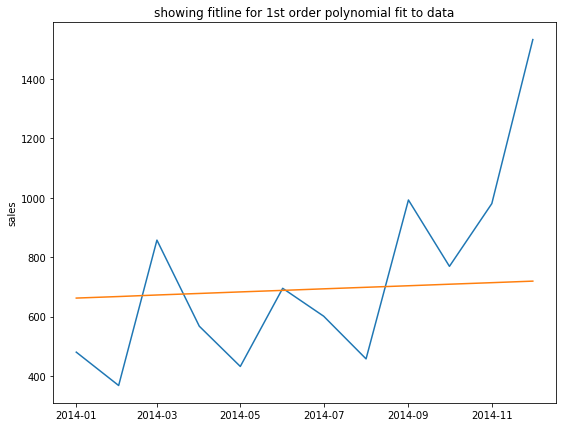

fitline parameters:
 
5.187 x + 662.2


In [8]:
dfy= pd.DataFrame(y)
dft= pd.DataFrame(yt)
dfo= pd.DataFrame(yo)
increasing_section=dfy.head(12)

line_coef = np.polyfit(range(0, len(dfy)),dfy["Sales"],1)
polynomial = np.poly1d(line_coef)

plt.figure(figsize=(9,7))
plt.plot(increasing_section.index, increasing_section["Sales"], label="Data")
plt.plot(increasing_section.index, polynomial(range(0, len(increasing_section))), label="Order 1 fit line")
plt.ylabel("sales")
plt.title("showing fitline for 1st order polynomial fit to data")
plt.show()
print("fitline parameters:")
print(polynomial)

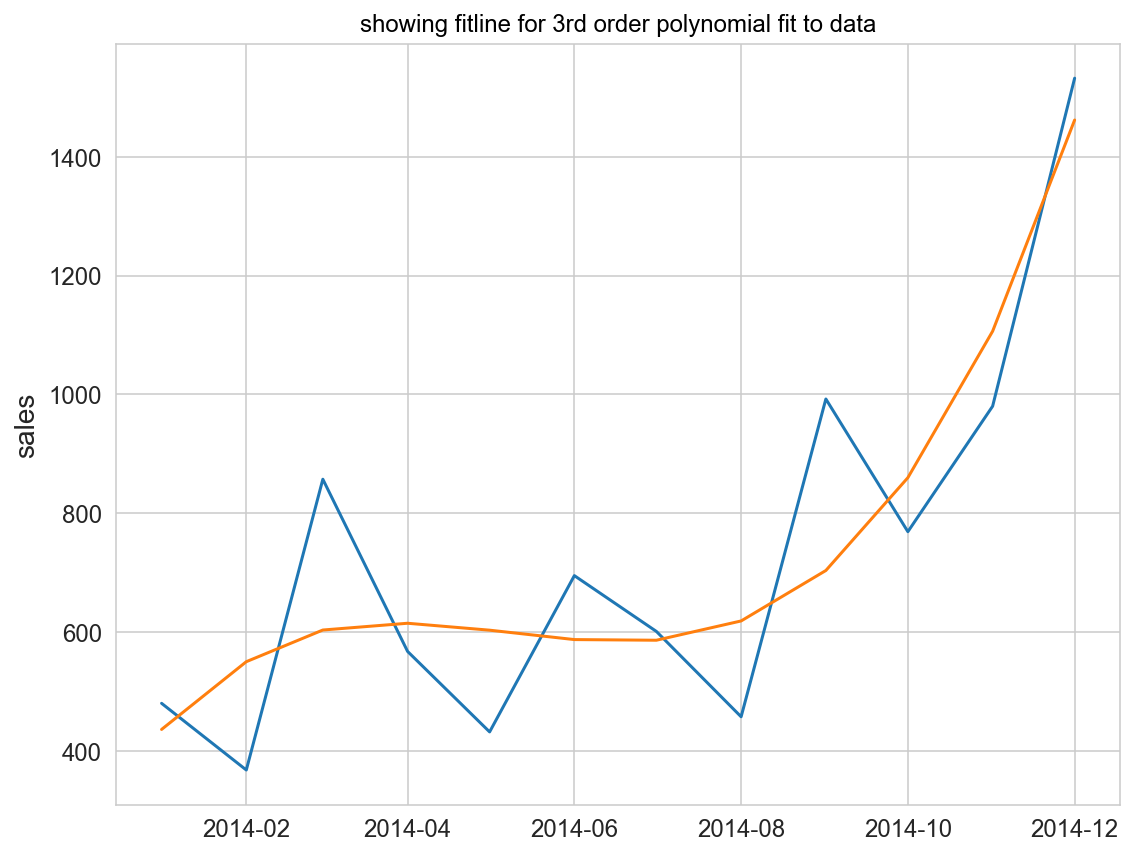

fitline parameters:
       3         2
3.145 x - 39.83 x + 150.8 x + 436.2


In [131]:
line_coef_2 = np.polyfit(range(0, len(increasing_section)),increasing_section["Sales"], 3)
polynomial_2 = np.poly1d(line_coef_2)
plt.figure(figsize=(9,7))
plt.plot(increasing_section.index, increasing_section["Sales"], label="Data")
plt.plot(increasing_section.index, polynomial_2(range(0, len(increasing_section))), label="Order 2 fit line")
plt.ylabel("sales")
plt.title("showing fitline for 3rd order polynomial fit to data")
plt.show()
print("fitline parameters:")
print(polynomial_2)

#### Summary Statistics
<a id="VisualizingSalesTimeSeriesData"></a>
<a id="SummaryStatistics"></a>
Summary statistics provide a quick look at the limits of observed values. It can help to get a quick idea of what we are working with.

In [9]:
#Summary Statistics
print(y.describe())

count      48.000000
mean      784.081373
std       306.873209
min       356.868273
25%       558.061703
50%       707.539737
75%       978.801722
max      1532.298325
Name: Sales, dtype: float64


#### Line Plot
<a id="LinePlot"></a>

A line plot of a time series can provide a lot of insight into the problem.

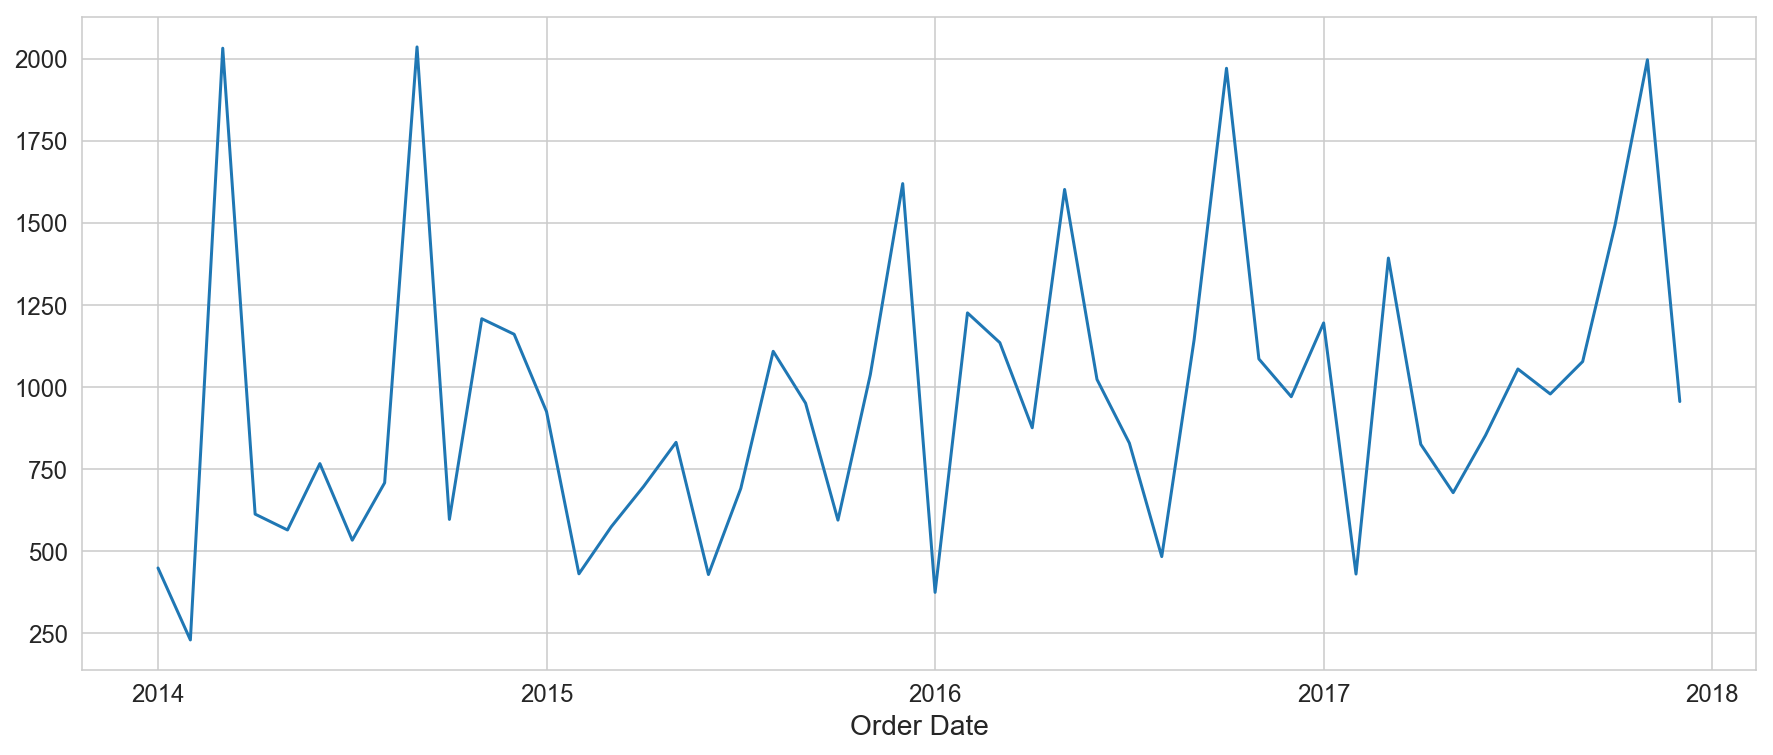

In [10]:
#y.plot(figsize=(15, 6))
yt.plot(figsize=(15, 6))
#yo.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data:

    - There is trend of sales, higher at end of year
    - There appears to be systematic seasonality to the sales for each year.
    -suggest it is addative relationship

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

#### Density Plot
<a id="DensityPlot"></a>
Reviewing plots of the density of observations can provide further insight into the structure of the data.

                             furniture


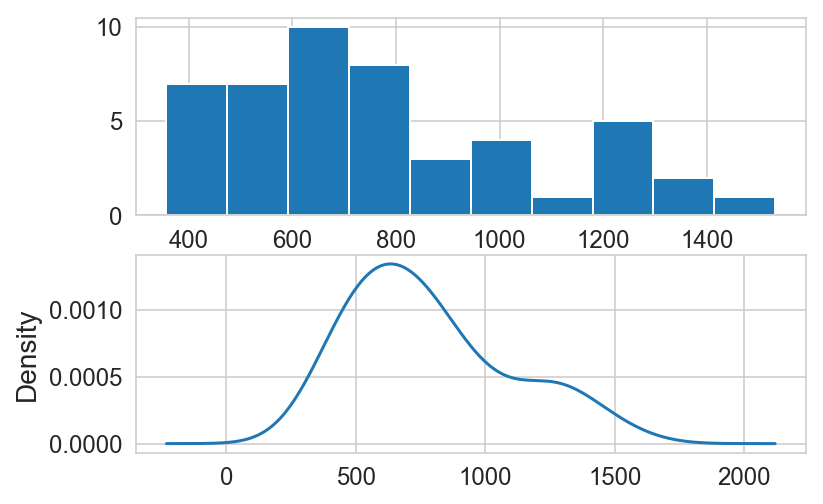

In [11]:
from pandas import Series
from matplotlib import pyplot
series = y.copy()
print( "                             furniture")
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()
#The shape has a long right tail and may suggest an exponential distribution
#The distribution is not Gaussian

#### Boxplot
<a id="Boxplot"></a>

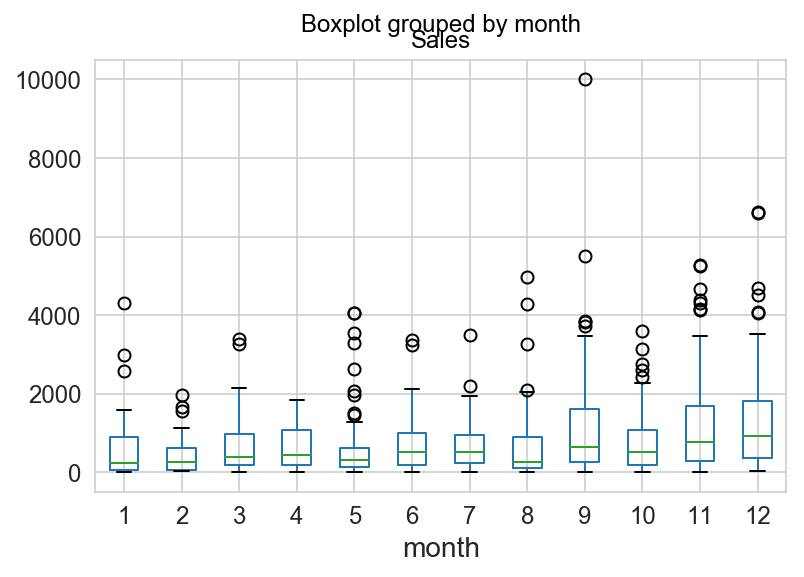

In [12]:
# boxplot
furniture['month'] = furniture.index.month
furniture_boxplot = furniture.boxplot(column=['Sales'], by='month')
furniture_boxplot

## Manually Configured ARIMA
<a id="ManuallyConfiguredARIMA"></a>
<a id="AdfullerTest"></a>
The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

Analysis of the time series data assumes that we are working with a stationary time series.

The time series is almost certainly non-stationary. We can make it stationary this by first differencing the series and using a statistical test to confirm that the result is stationary.

Seasonal data can be differenced by subtracting the observation from the same time in the previous cycle, in this case the same month in the previous year. This does mean that we will lose the first year of observations as there is no prior year to difference with.

----
#### Eliminating Trend and Seasonality

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

    -Differencing – taking the differece with a particular time lag
    -Decomposition – modeling both trend and seasonality and removing them from the model.

#### Adfuller Test

In [13]:
from statsmodels.tsa.stattools import adfuller
def stationary_test(data, window_type):
    rate= y.copy()
    #rolling mean
    rm = rate.rolling (window = window_type).mean()
    #median
    rmd = rate.rolling(window = window_type).median()
    #expanding
    em = rate.expanding().mean()
    #explonentially weighted mean
    ewm= rate.ewm(span =window_type).mean()
    
    #dikey fuller test is like t test to test hypotesis if the time series is stationary or not
    dft= adfuller(rate)
    print ('original data')
    dft_result= pd.Series (dft[0:4], index = ['T-stats', 'p_values','#Lags Used','Number of Observations Used'])
    for key,value in list(dft[4].items()):
        dft_result['Critical Value (%s)'%key] = value
    print (dft_result)
    
    
    #diff the time series
    rate_diff = rate- rate.shift()
    rate_diff.dropna(inplace= True)
    #dikey fuller test is like t test to test hypotesis if the time series is stationary or not
    dft2= adfuller(rate_diff)
    print('')
    print ('with differencing')
    dft_result2= pd.Series (dft2[:4], index = ['T-stats', 'p_values','#Lags Used','Number of Observations Used'])
    for key,value in list(dft2[4].items()):
        dft_result2['Critical Value (%s)'%key] = value
    print (dft_result2)
    
    rolling_list = [rate,rm,rmd,em,ewm]
    label_list = ['original','mean','median','expanding mean','explonentially weighted mean']
    for u,v in zip(rolling_list,label_list):
        u.plot(label=v, figsize=(10,4),lw=2) #lw thinkness of line
        plt.legend()
       #yo_frame=pd.DataFrame(yo)

                          technology
original data
T-stats                        -5.191070
p_values                        0.000009
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

with differencing
T-stats                       -6.981398e+00
p_values                       8.174525e-10
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


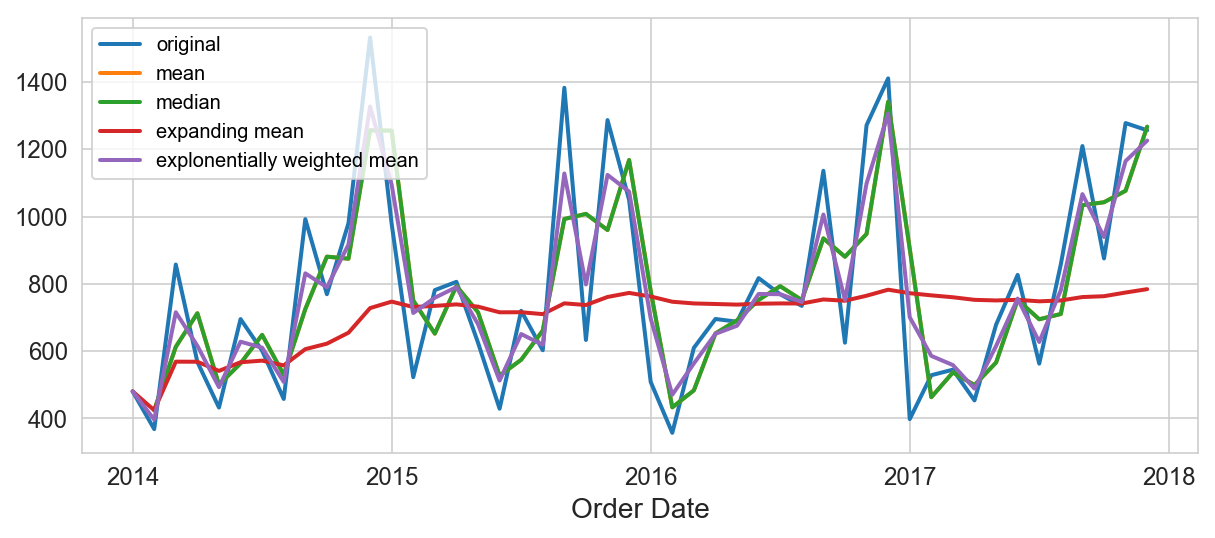

In [14]:
print('                          technology')
stationary_test(y,2)

#### Decomposition
<a id="Decomposition"></a>

#### Additive Model
Additive Model – During the development of additive models there is an implicit assumption that the different components affect the time series additively

Data = Seasonal effect + Trend + Cyclical + Residual

For example, for monthly data, an additive model assumes that the difference between the January and July values is approximately the same each year. In other words, the amplitude of the seasonal effect is the same each year.

The model similarly assumes that the residuals are roughly the same size throughout the series -- they are a random component that adds on to the other components in the same way at all parts of the series.

#### Multiplicative models
Multiplicative models - In many time series involving quantities (e.g. money, wheat production, etc.), the absolute differences in the values are of less interest and importance than the percentage changes.

For example, in seasonal data, it might be more useful to model that the July value is the same proportion higher than the January value in each year, rather than assuming that their difference is constant. Assuming that the seasonal and other effects act proportionally on the series is equivalent to a multiplicative model,

Data = Seasonal effect * Trend * Cyclical * Residual

Example - For example, suppose we wanted to forecast from month to month the number of households that purchase a particular consumer electronics device (e.g., TV). Every year, the number of households that purchase a TV will increase, however, this trend will be damped (i.e., the upward trend will slowly disappear) over time as the market becomes saturated. In addition, there will be a seasonal component, reflecting the seasonal changes in consumer demand for TVs from month to month (demand will likely be smaller in the summer and greater during the December holidays). This seasonal component may be additive, for example, a relatively stable number of additional households may purchase TVs during the December holiday season. 

#### additive

                            funiture


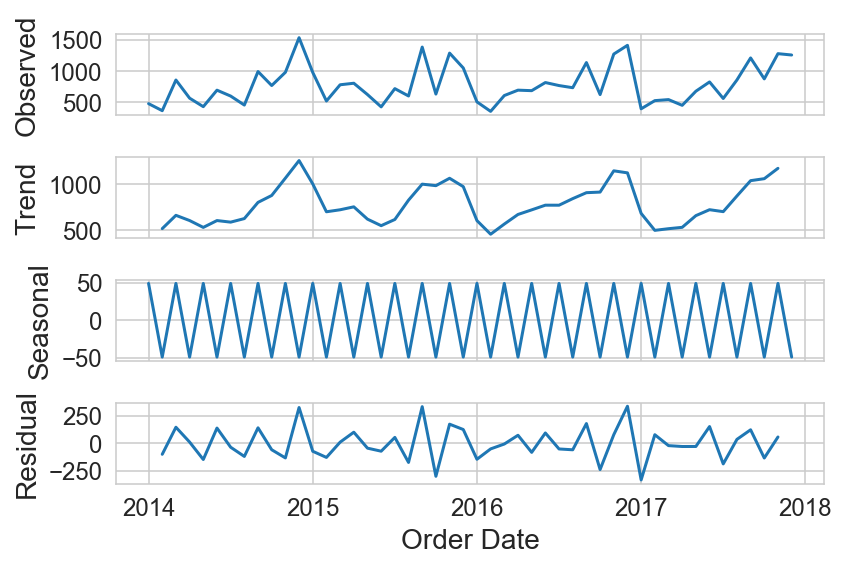

In [40]:
print ('                            funiture')
decompositiont = sm.tsa.seasonal_decompose(y, model='additive',freq= 2)
fig = decompositiont.plot()
plt.show()


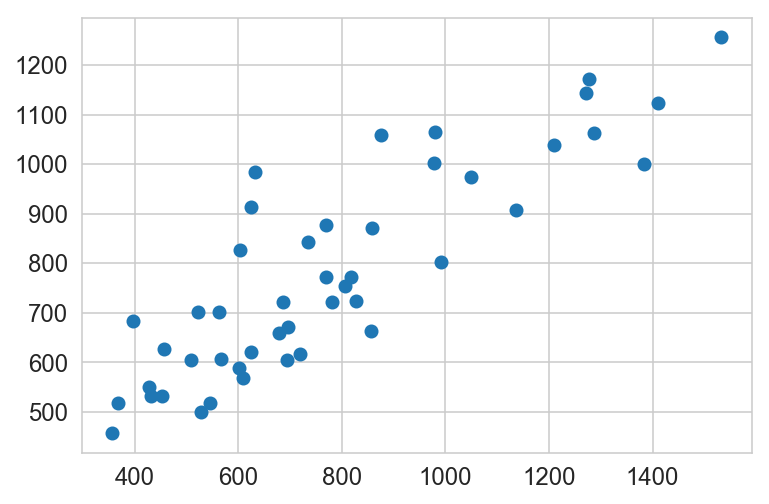

In [41]:
plt.scatter(x= y, y=decompositiont.trend, label= 'trend')

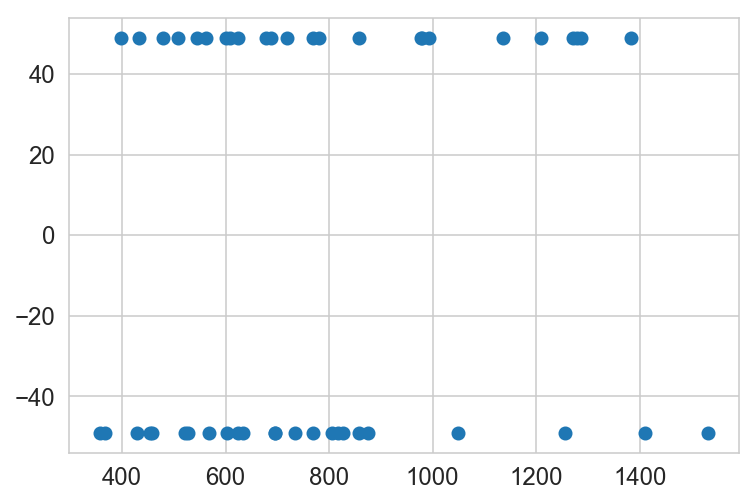

In [42]:
plt.scatter(x= y, y=decompositiont.seasonal, label= 'seasonal')

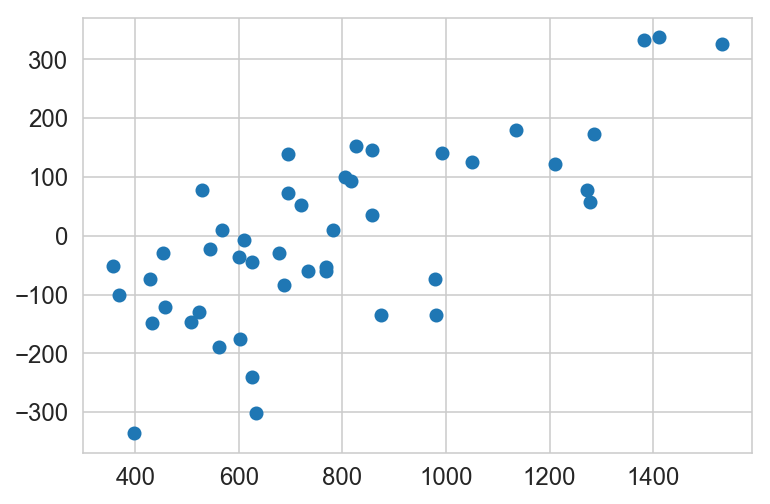

In [43]:
plt.scatter(x= y, y=decompositiont.resid, label= 'Residual')

#### Check Sesonality

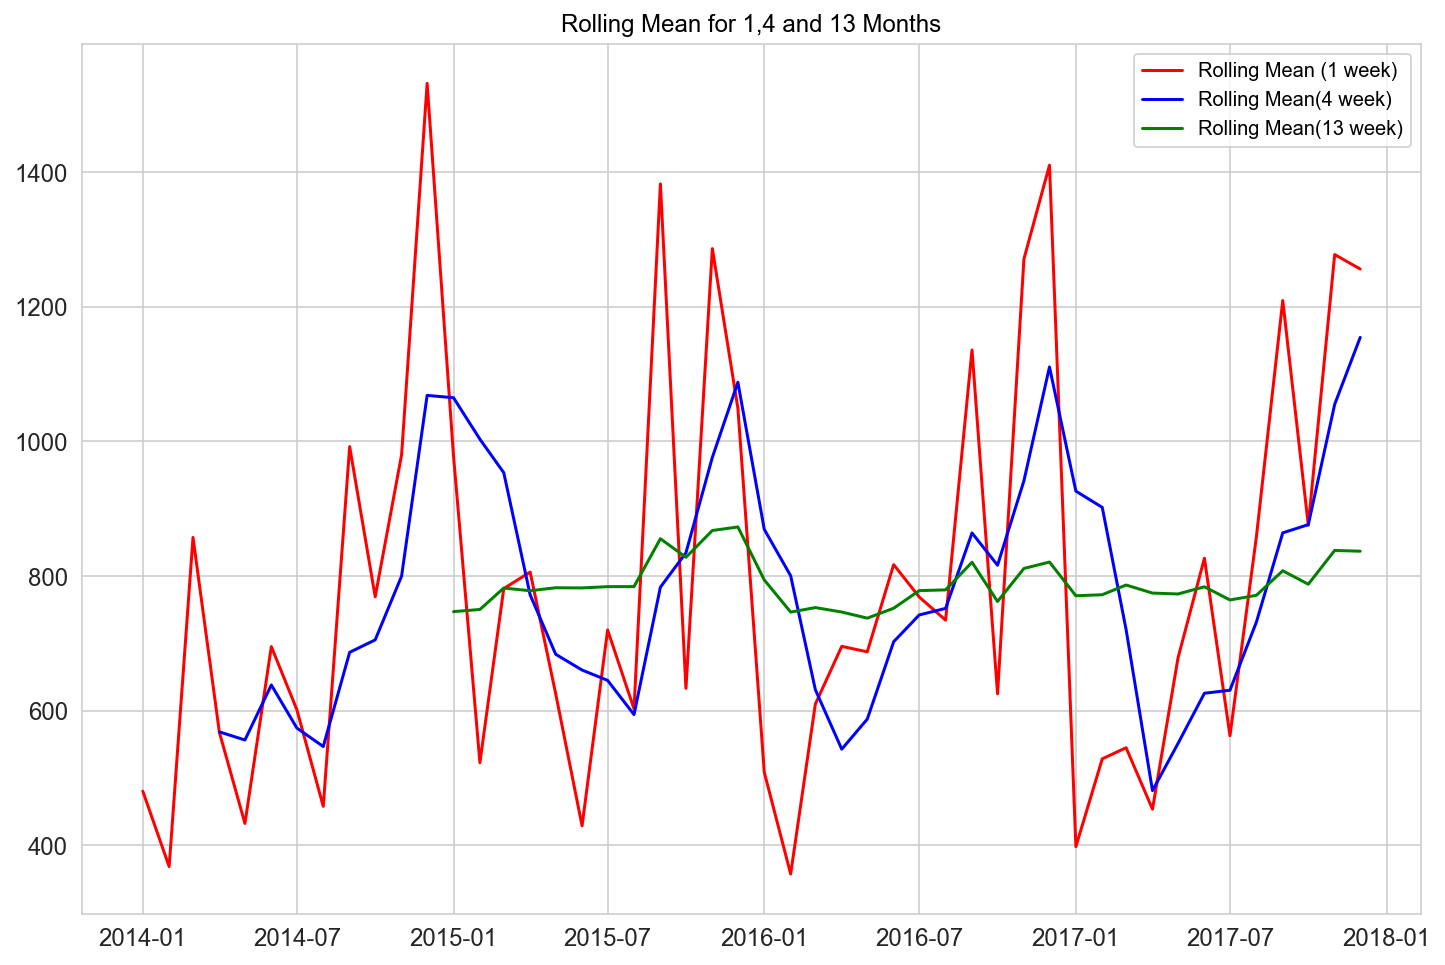

In [44]:
rolmean1 = y.rolling(1).mean()
rolmean4 = y.rolling(4).mean()
rolmean13 = y.rolling(13).mean()

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
mean = plt.plot(rolmean1, color='red', label='Rolling Mean (1 week)')
mean = plt.plot(rolmean4, color='blue', label='Rolling Mean(4 week)')
mean = plt.plot(rolmean13, color='green', label='Rolling Mean(13 week)')

plt.legend(loc='best')
plt.title('Rolling Mean for 1,4 and 13 Months')
plt.show()
#https://git.generalassemb.ly/DSi-PLUS-SYD-MEL/Unit-4-Restructured/blob/master/06.TimeSeries/dsi-unit-4.48-timeseries-arima-lab/solution-code/ARIMA-lab-solutions.ipynb

There are clearly spikes in the early year around january Most likely the result of huge increases for holiday spending in November and December.

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

In [45]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=2, center=False).mean()
    rolstd = timeseries.rolling(window=2, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(17, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

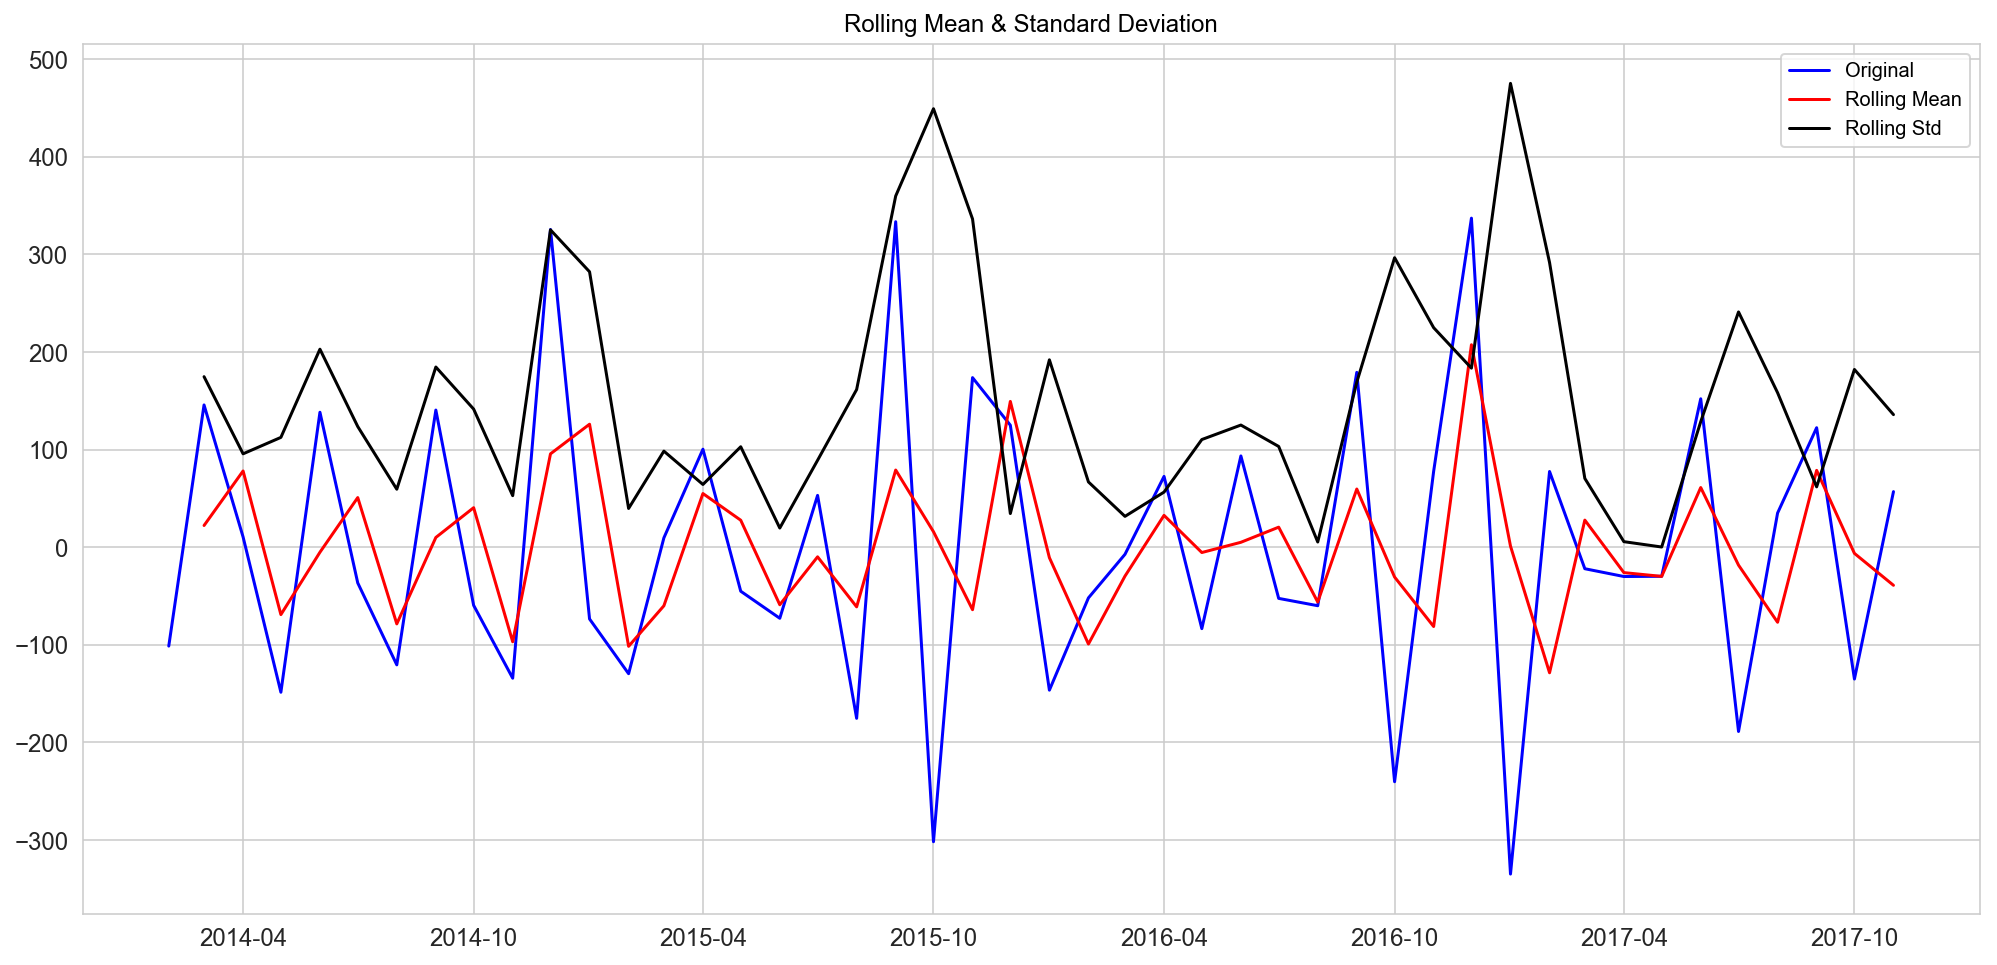

Results of Dickey-Fuller Test:
Test Statistic                 -4.907202
p-value                         0.000034
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
technology ,The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary


In [46]:
resid_y=decompositiont.resid
resid_y.dropna(inplace=True)
test_stationarity(resid_y)
print('technology ,The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary')

In [22]:
#plt.scatter(x= y, y=decompositionf.trend, label= 'trend')
#plt.scatter(x= y, y=decompositionf.seasonal, label= 'seasonalresid')
#plt.scatter(x= y, y=decompositionf.resid, label= 'resid')

#### ACF PACF
<a id="ACFPACF"></a>

#### autocorrelation
To compute autocorrelation, we fix a lag k which is the delta between the given point and the prior point used to compute the correlation.
With a k value of 1, we'd compute how correlated a value is with the prior one. With a k value of 10, we'd compute how correlated a variable is with one 10 time points earlier.

#### Partial autocorrelation and the partial autocorrelation function (PACF)
Another important chart to diagnose your timeseries is the partial autocorrelation chart (PACF). This is similar to the autocorrelation, but instead of just the correlation at increasing lags, it is the correlation at a given lag controlling for the effect of previous lags.

ACF plot it is merely a bar chart of the coefficients of correlation between a time series and lags of itself.

PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

                      furniture


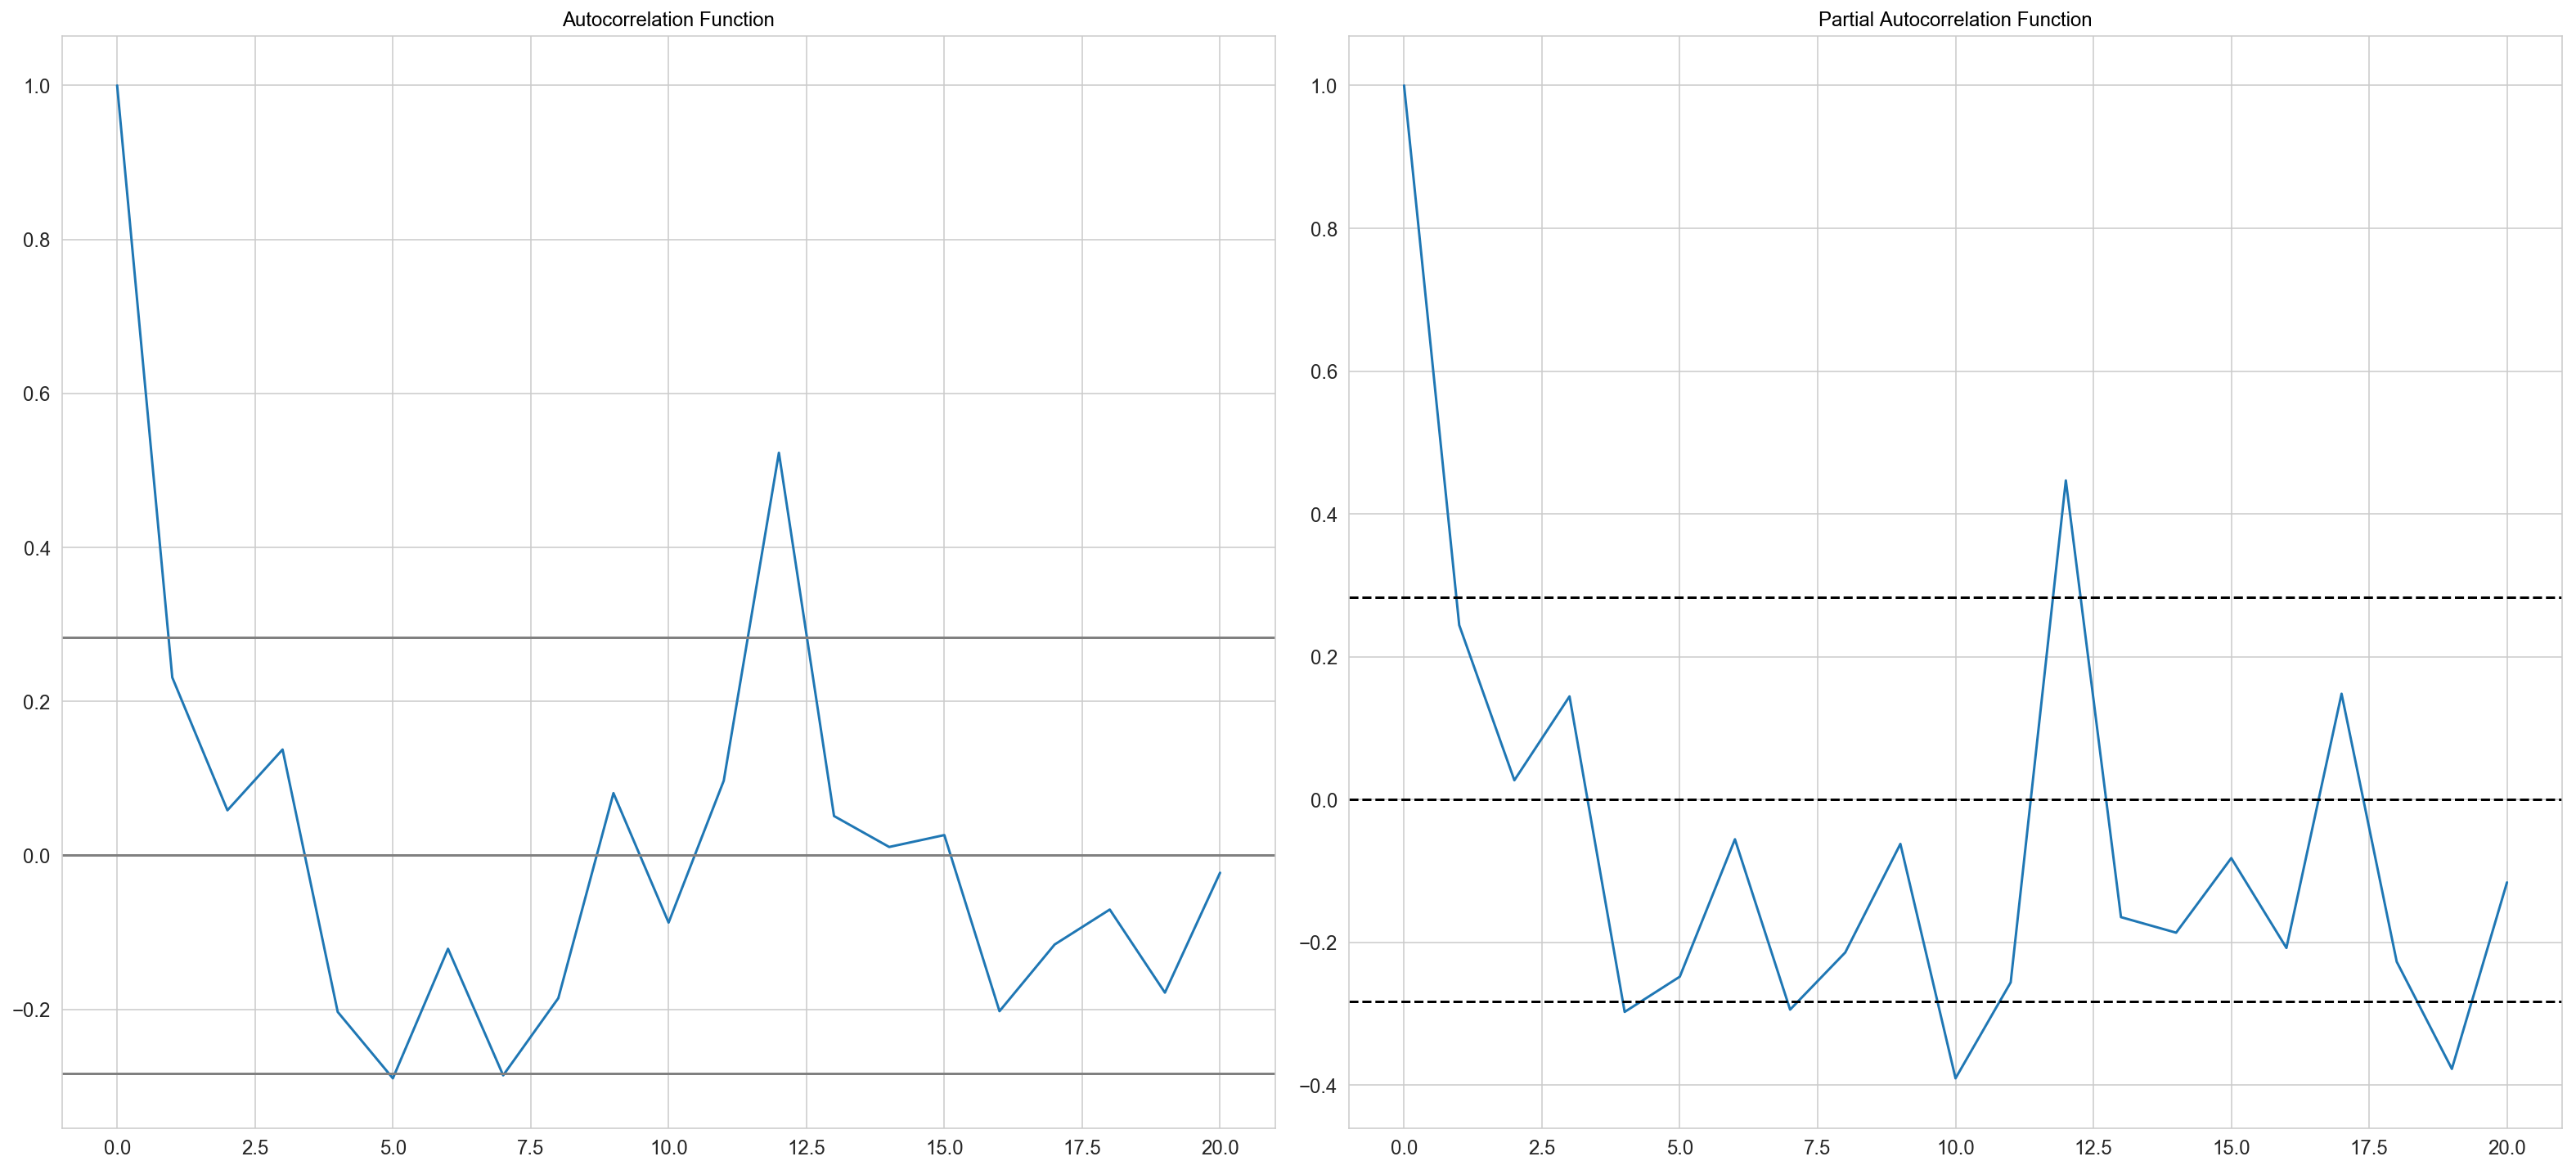

In [58]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y, nlags=20)
lag_pacf = pacf(y, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))
print('                      furniture')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='-',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='-',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

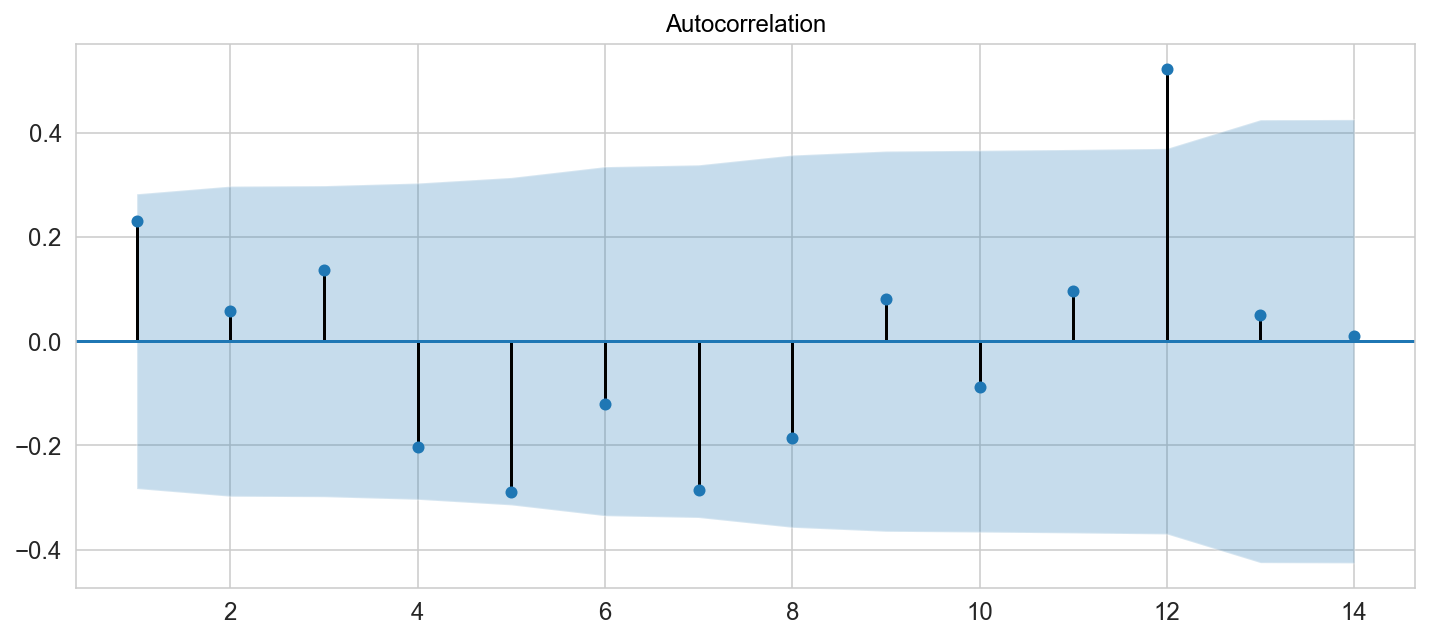

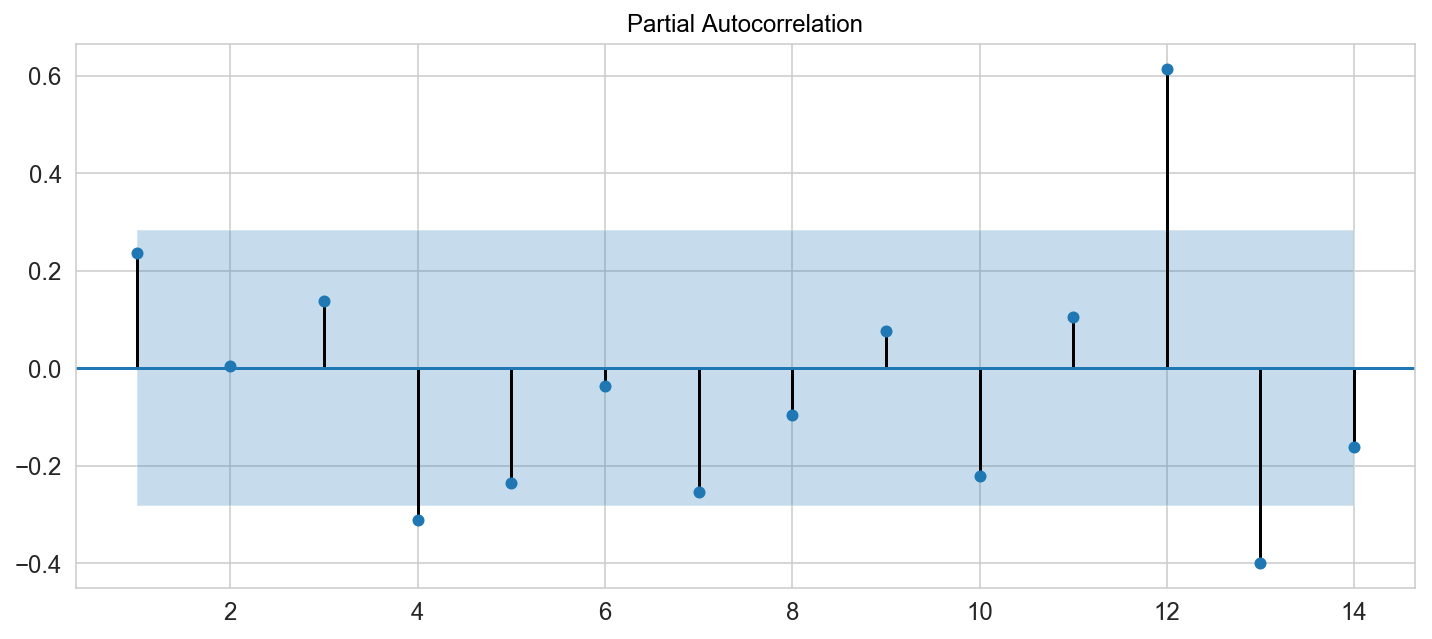

acf [ 1.          0.23099881  0.05845247  0.13740032 -0.20349439 -0.28971729
 -0.12144909 -0.28586549 -0.18564023  0.08071278 -0.08741769  0.09684871
  0.52286567  0.0509833   0.01080028  0.02623106 -0.20254521 -0.11591515
 -0.07048065 -0.17842959 -0.02266248  0.06287232 -0.07450286  0.17393977
  0.35262754  0.0255596   0.02904366 -0.04093169 -0.2250858  -0.08994644
 -0.0744134  -0.15727408  0.05120245  0.09348592 -0.04194728  0.15408845
  0.19551079  0.02997289  0.05716242  0.01179317 -0.09491623]

pacf [ 1.          0.23591367  0.00565325  0.13863889 -0.31023348 -0.23474572
 -0.03671812 -0.25414583 -0.09481479  0.07751704 -0.22048035  0.10491938
  0.61430299 -0.3989844  -0.16047758 -0.20891527 -0.111276    0.4180041
 -0.30391086 -0.09182035  0.31675623 -0.548264    0.70233395  1.2432518
  3.43017541 -1.60664435 -1.01251785 -4.70879657  1.10149261  3.98619892
 -1.26456551 -0.46394089  1.15790978  0.05504659  1.41511811  2.43993919
 -0.83789026  1.07516162  4.15322532 -1.1080934  -1.91

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax= plt.subplots(figsize=(12,5))
plot_acf(y, lags=range(1,15), ax= ax)
plt.show()

fig, ax= plt.subplots(figsize=(12,5))
plot_pacf(y, lags=range(1,15), ax= ax)
plt.show()

print ('acf',acf(y.values))
print('')
print ('pacf',pacf(y.values))

for i in [1,4,17,24]:
    print('{} month Lag AutoCorr'.format(i), y.autocorr(lag=i))

so we know p and q is 1 and d=0 or 1

In [25]:
#detrend of the time series
y_frames=pd.DataFrame(y)
y_frames['y_rate_diff']= y_frames.Sales- y_frames.Sales.shift()

## Autoregressive (AR) models
Autoregressive (AR) models use data from previous time-points to predict the next time-point. These are essentially regression models where the predictors are previous timepoints of the outcome.

Typically, AR models are denoted AR(p), where p indicates the number of previous time points to incorporate. AR(1) is the most common.
In an autoregressive model we learn regression coefficients on the features that are the previous p values.

http://localhost:8889/notebooks/Desktop/generalassembly/datasciences/GA%20materials/Unit-4-Restructured/06.TimeSeries/dsi-unit-4.46-timeseries-arma-lesson/solution-code/timeseries-arma-solutions.ipynb

In [26]:
y.shape

(48,)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   48
Model:                    ARMA(14, 0)   Log Likelihood                -322.719
Method:                       css-mle   S.D. of innovations            182.040
Date:                Thu, 22 Nov 2018   AIC                            677.439
Time:                        14:36:36   BIC                            707.378
Sample:                             0   HQIC                           688.753
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        784.2270      8.643     90.732      0.000     767.286     801.168
ar.L1.y        0.0188      0.162      0.116      0.908      -0.298       0.336
ar.L2.y       -0.0746      0.161     -0.462      0.6

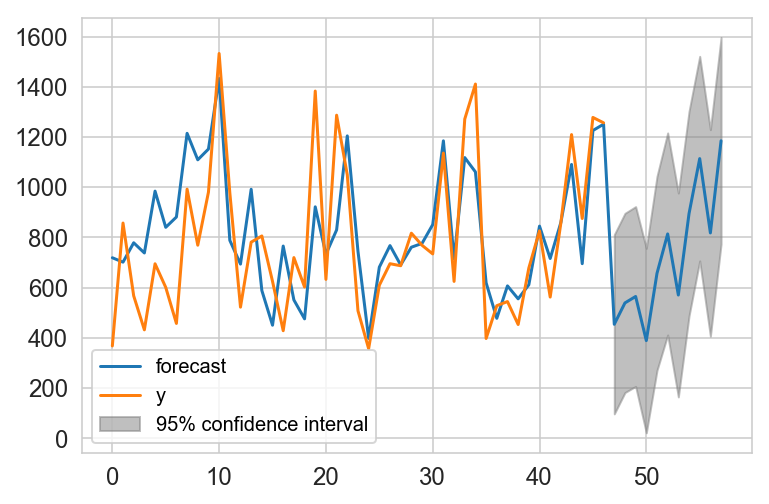

In [27]:
from statsmodels.tsa.arima_model import ARMA
ar1 = ARMA(y.values, (14, 0)).fit()
print(ar1.summary())
print (r2_score(y, ar1.fittedvalues))

ar1.plot_predict(start=1, end=58)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   48
Model:                    ARMA(14, 0)   Log Likelihood                -322.719
Method:                       css-mle   S.D. of innovations            182.040
Date:                Thu, 22 Nov 2018   AIC                            677.439
Time:                        14:37:01   BIC                            707.378
Sample:                    01-01-2014   HQIC                           688.753
                         - 12-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          784.2270      8.643     90.732      0.000     767.286     801.168
ar.L1.Sales      0.0188      0.162      0.116      0.908      -0.298       0.336
ar.L2.Sales     -0.0746      0.161     -0.46

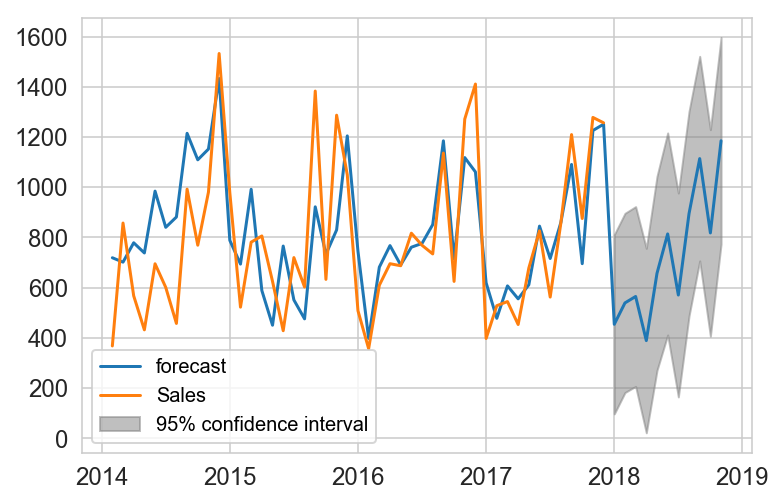

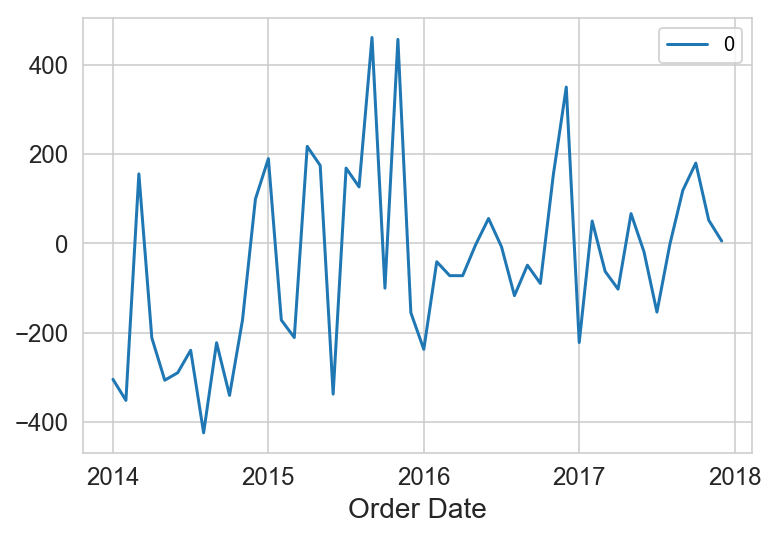

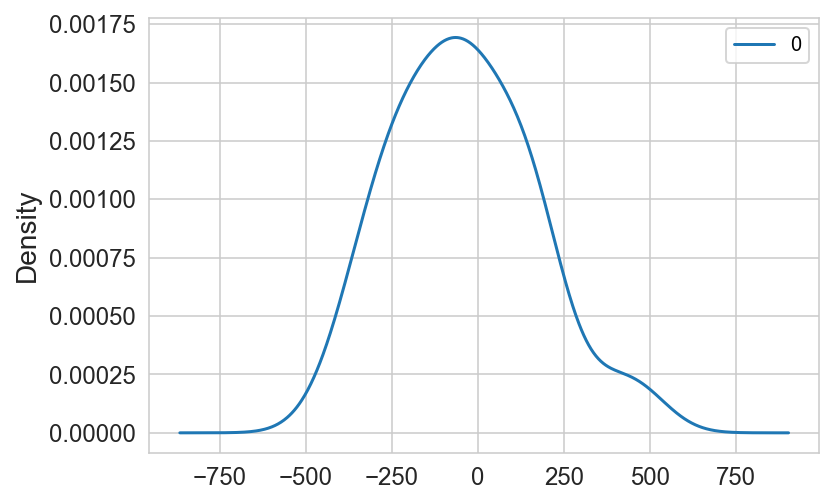

                0
count   48.000000
mean   -41.619763
std    206.583114
min   -423.807486
25%   -210.672513
50%    -55.532601
75%    104.342242
max    460.948866


In [28]:
from statsmodels.tsa.arima_model import ARIMA
arima1 = ARIMA(y, order=(14,0,0)).fit()
print(arima1.summary())
print (r2_score(y, arima1.fittedvalues))

arima1.plot_predict(start=1, end=58)
plt.show()
# plot residual errors
residuals = DataFrame(arima1.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Moving Average (MA) models
Moving average models take previous error terms as inputs. They predict the next value based on deviations from previous predictions. This can be useful for modeling a sudden occurrence - like something going out of stock affecting sales or a sudden rise in popularity.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   48
Model:                    ARMA(0, 11)   Log Likelihood                -332.651
Method:                       css-mle   S.D. of innovations            222.769
Date:                Thu, 22 Nov 2018   AIC                            691.301
Time:                        14:37:11   BIC                            715.627
Sample:                             0   HQIC                           700.494
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        787.3090     26.736     29.448      0.000     734.908     839.710
ma.L1.y        0.4114        nan        nan        nan         nan         nan
ma.L2.y        0.2703      0.159      1.702      0.0

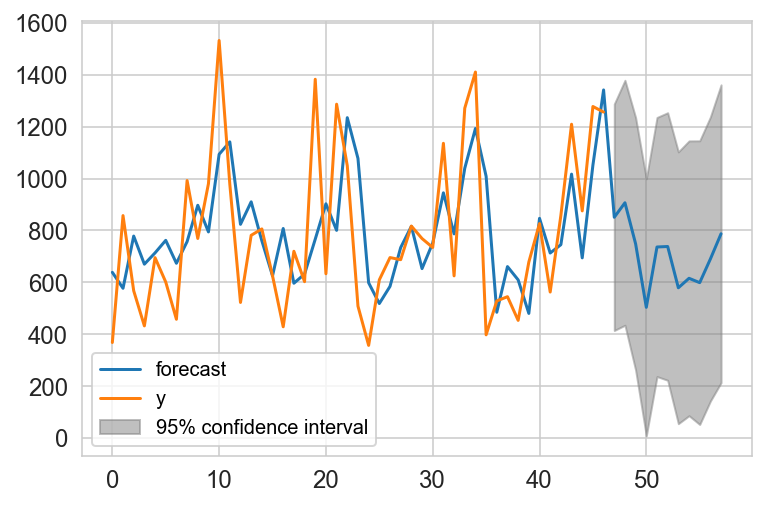

In [29]:
from statsmodels.tsa.arima_model import ARMA
ar1 = ARMA(y.values, (0, 11)).fit()
print(ar1.summary())
print (r2_score(y, ar1.fittedvalues))

ar1.plot_predict(start=1, end=58)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   48
Model:                    ARMA(0, 11)   Log Likelihood                -332.651
Method:                       css-mle   S.D. of innovations            222.769
Date:                Thu, 22 Nov 2018   AIC                            691.301
Time:                        14:37:20   BIC                            715.627
Sample:                    01-01-2014   HQIC                           700.494
                         - 12-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          787.3090     26.736     29.448      0.000     734.908     839.710
ma.L1.Sales      0.4114        nan        nan        nan         nan         nan
ma.L2.Sales      0.2703      0.159      1.70

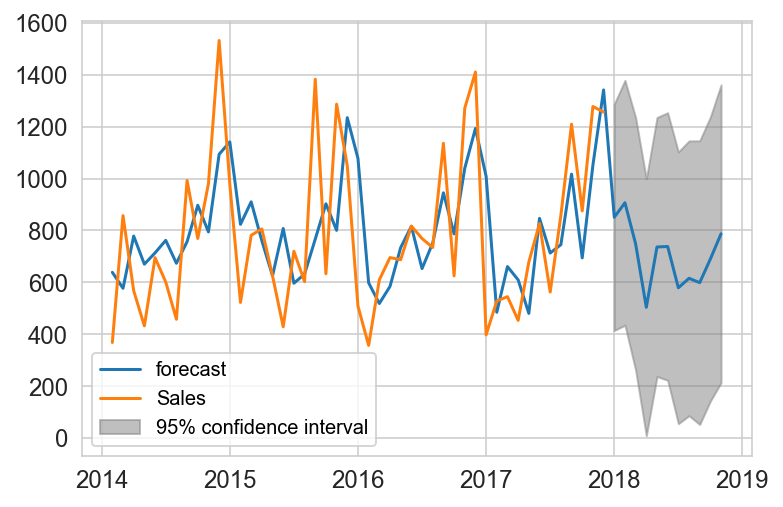

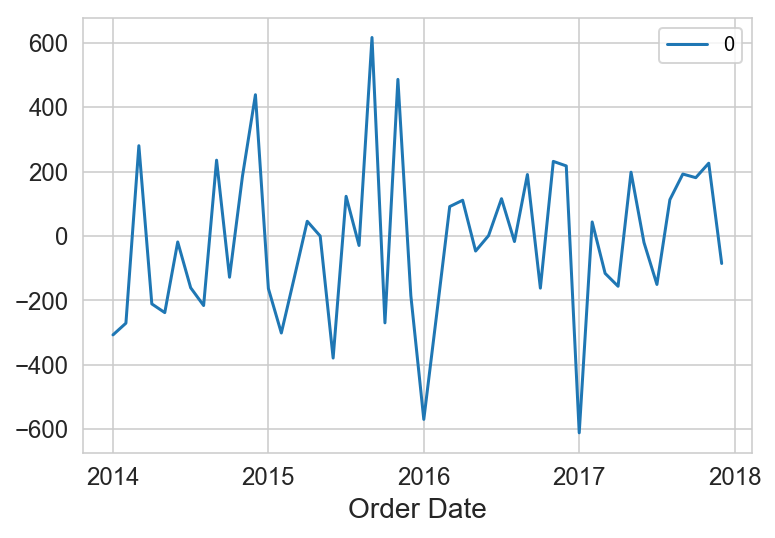

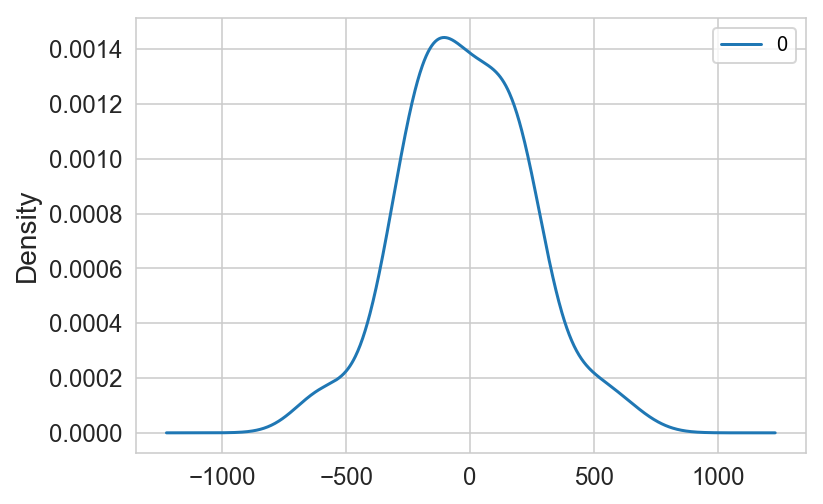

                0
count   48.000000
mean   -17.831210
std    249.349623
min   -611.161971
25%   -168.722377
50%    -19.318229
75%    182.323269
max    616.424545


In [30]:
arima1 = ARIMA(y, order=(0,0,11)).fit()
print(arima1.summary())
print (r2_score(y, arima1.fittedvalues))

arima1.plot_predict(start=1, end=58)
plt.show()
# plot residual errors
residuals = DataFrame(arima1.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


## ARMA and ARIMA models

#### ARMA
ARMA models combine the autoregressive models and moving average models. We combine both, parameterizing the behavior of the model with p and q terms corresponding to the AR(p) model and MA(q) model.
Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. Moving average models base their prediction not on the prior value but the prior error, allowing us to correct sudden changes based on random events - supply, popularity spikes, etc.

#### ARIMA
ARIMA is just like the ARMA(p, q) model, but instead of predicting the value of the series it predicts the differenced series or changes in the series. The order of differencing is set by an d term as in ARIMA(p, d, q), or alternatively you can just fit an ARMA(p, q) model on a differenced timeseries.

Recall the pandas diff function. This computes the difference between two consecutive values. In an ARIMA model, we attempt to predict this difference instead of the actual values.
 
Timeseries are assumed to be "stationary" when modeling. This handles the stationarity assumption: instead of detrending or differencing manually, the model does this via the differencing term.

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   48
Model:                     ARMA(8, 5)   Log Likelihood                -324.867
Method:                       css-mle   S.D. of innovations            171.162
Date:                Thu, 22 Nov 2018   AIC                            679.735
Time:                        14:37:28   BIC                            707.803
Sample:                    01-01-2014   HQIC                           690.342
                         - 12-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         786.6793      1.190    661.207      0.000     784.347     789.011
ar.L1.Sales  1.932e-05      0.356   5.43e-05      1.000      -0.698       0.698
ar.L2.Sales     0.3648      0.257      1.418    

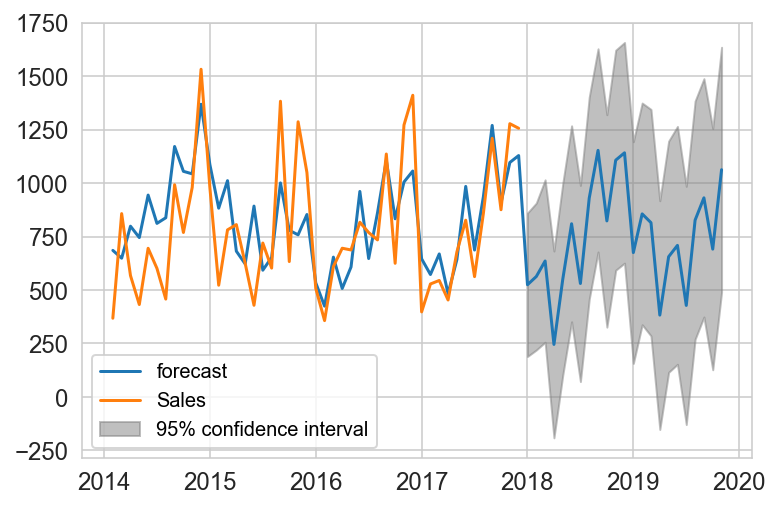

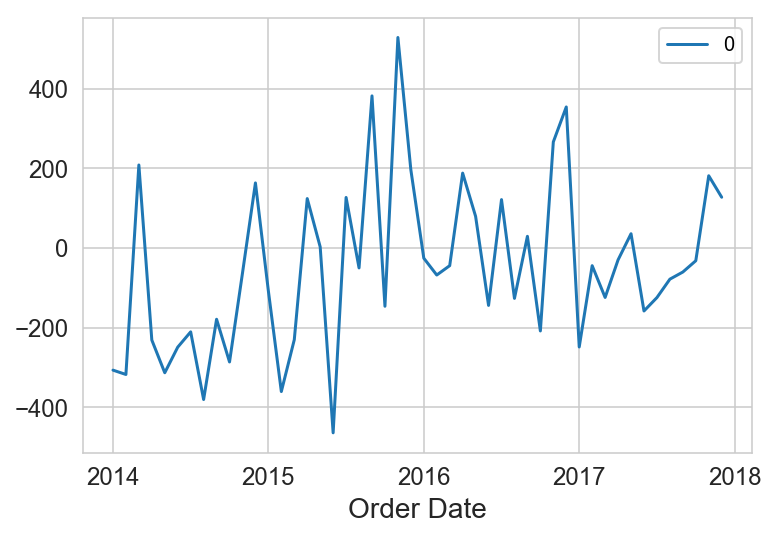

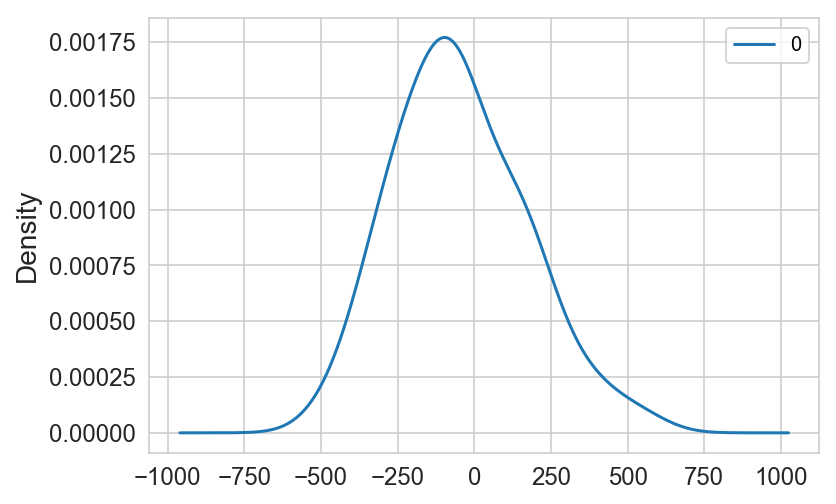

                0
count   48.000000
mean   -47.725345
std    212.738426
min   -463.905132
25%   -208.707455
50%    -61.605973
75%    122.283895
max    528.622076
0.49470936824469125


In [31]:
arima1 = ARIMA(y, order=(8,0,5)).fit()
print(arima1.summary())
print (r2_score(y, arima1.fittedvalues))

arima1.plot_predict(start=1, end=70)
plt.show()
# plot residual errors
residuals = DataFrame(arima1.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
print (r2_score(y, arima1.fittedvalues))

## SARIMAX
we know there is sesonal 12 months

In [32]:
model = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,0,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -239.282
Date:                            Thu, 22 Nov 2018   AIC                            486.563
Time:                                    14:37:29   BIC                            492.785
Sample:                                01-01-2014   HQIC                           488.711
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.238      0.284      0.776      -0.398       0.534
ma.L1         -0.9988      9.431   

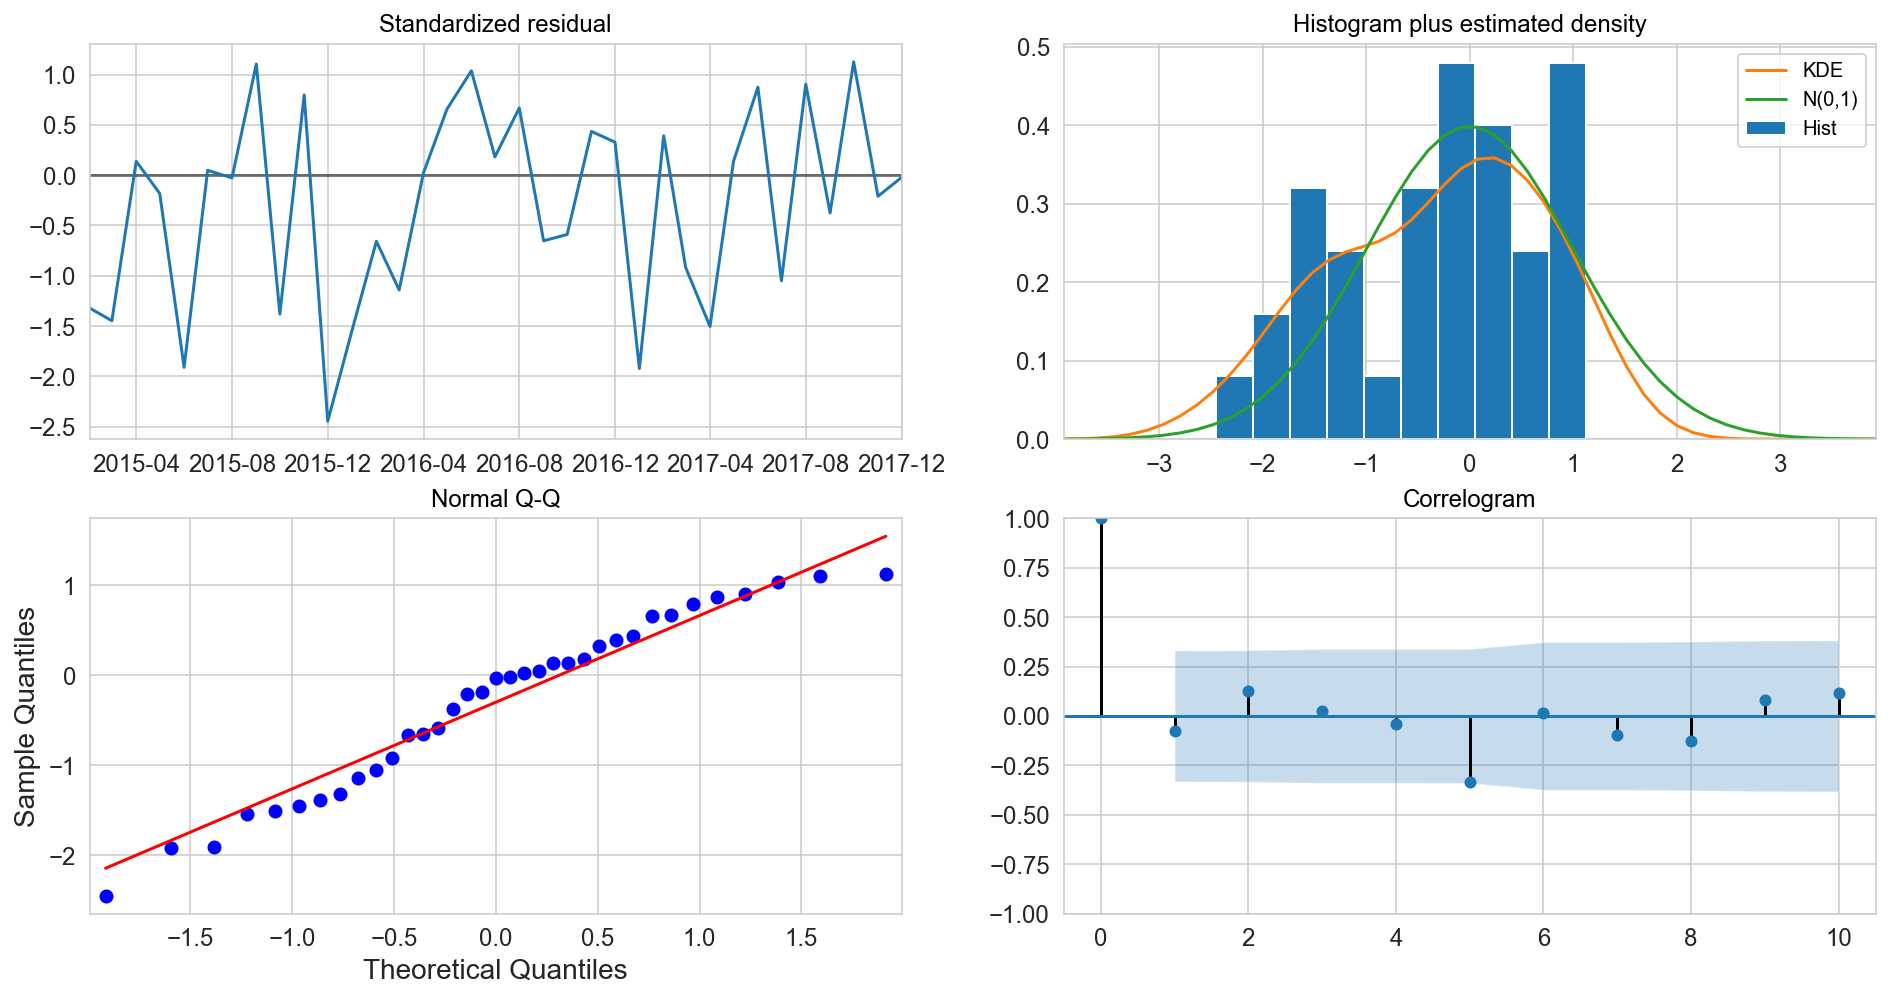

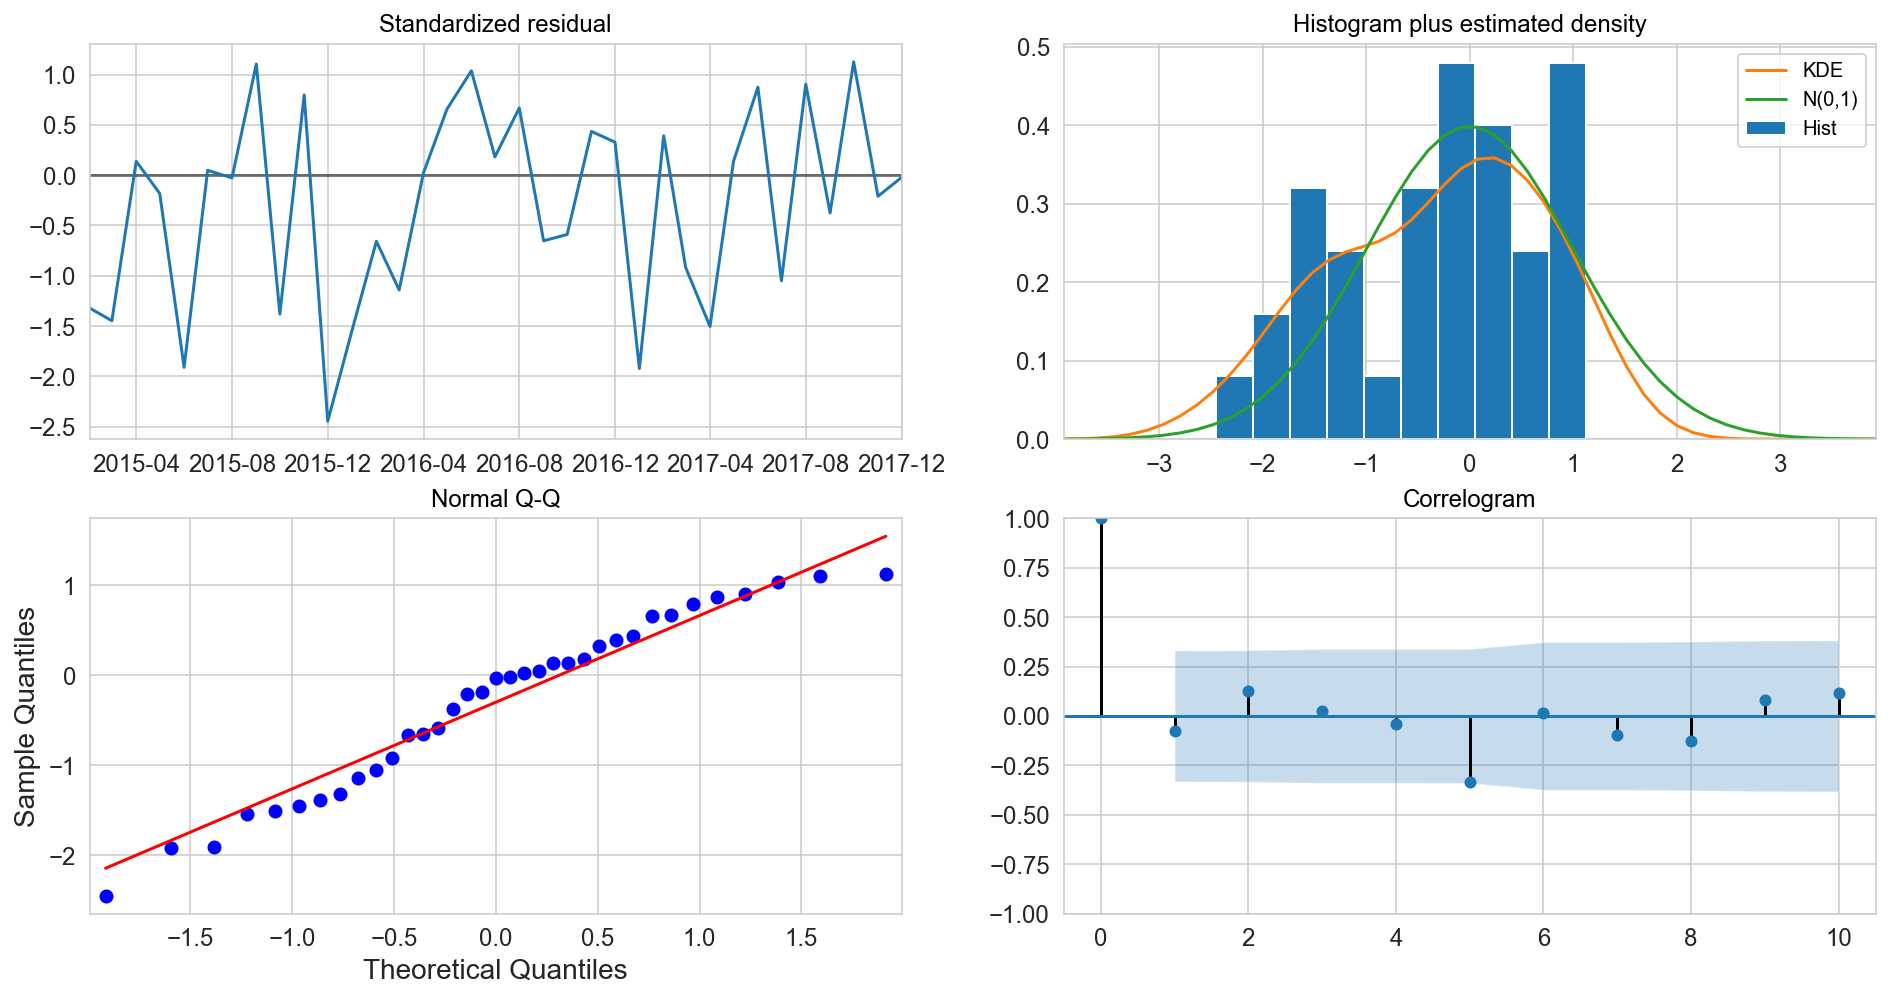

In [33]:
results.plot_diagnostics(figsize=(16, 8))

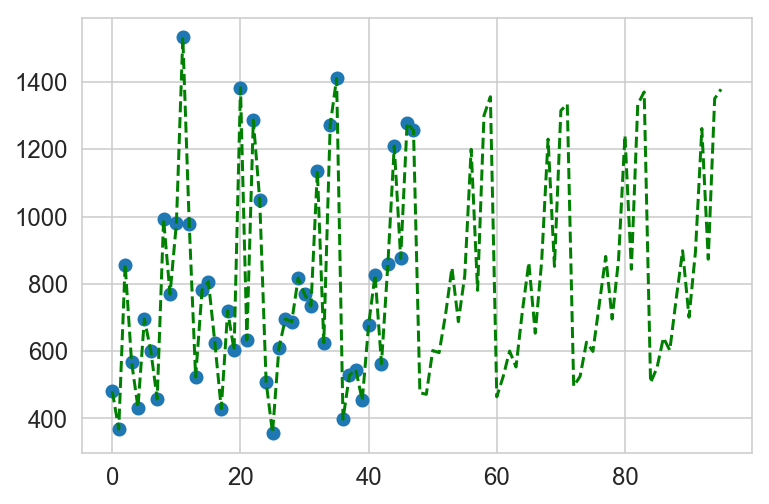

In [34]:
# forecasting
data= y.values
# forecasting
res = model.fit()
preds = res.forecast(48)
fcast = np.concatenate((data, preds), axis=0)
plt.figure();
plt.plot(data, 'o' , fcast, 'g--');

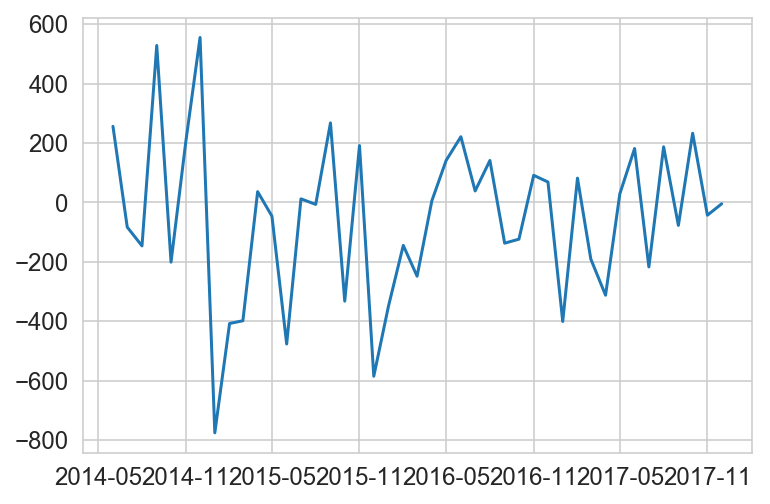

In [35]:
# Don't plot the first 5 values, to account for data loss when differencing (d=1 + D=5)
residuals = results.resid[5:]
#residuals = results.resid[5:]
plt.plot(residuals)

                    #### another method ####

## Time series forecasting with ARIMA
<a id="TimeseriesforecastingwithARIMA"></a>
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [40]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


my goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for my model.

In [41]:
print ('                            furniture')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

                            furniture
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1487.3486127476096
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202183
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1260.7566140168947
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758112
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3389.4989567343055
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.560742980912
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.590501550539
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4012.4234034655774
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946867
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1422.801590336435
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1417.9571272056203
ARIMA(0, 1, 0)x(1, 1, 

## Fitting the ARIMA model
<a id="FittingtheARIMAmodel"></a>

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   48
Model:                     ARMA(8, 5)   Log Likelihood                -324.867
Method:                       css-mle   S.D. of innovations            171.162
Date:                Thu, 22 Nov 2018   AIC                            679.735
Time:                        13:46:00   BIC                            707.803
Sample:                    01-01-2014   HQIC                           690.342
                         - 12-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         786.6793      1.190    661.207      0.000     784.347     789.011
ar.L1.Sales  1.932e-05      0.356   5.43e-05      1.000      -0.698       0.698
ar.L2.Sales     0.3648      0.257      1.418    

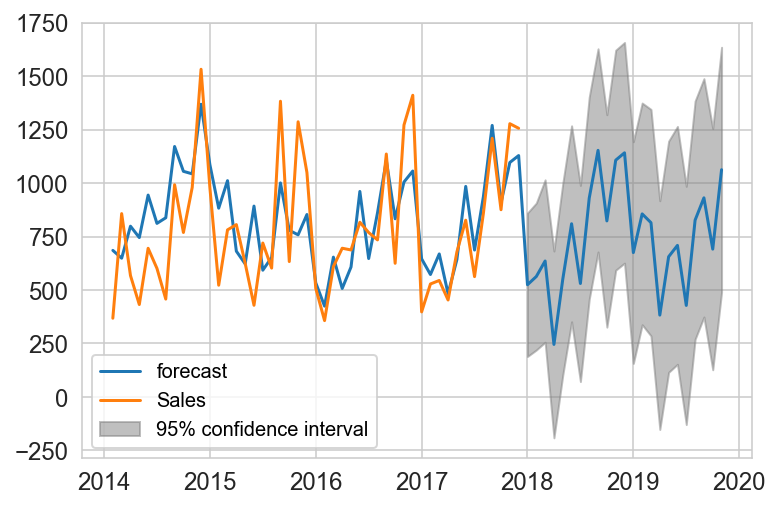

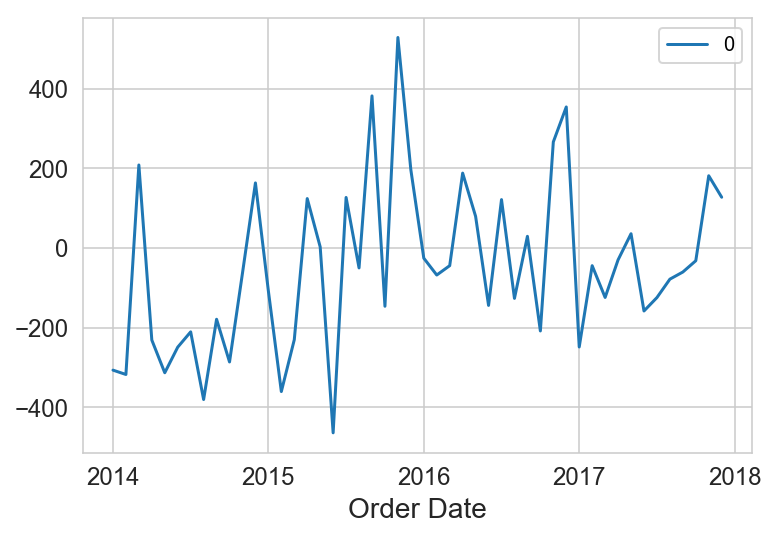

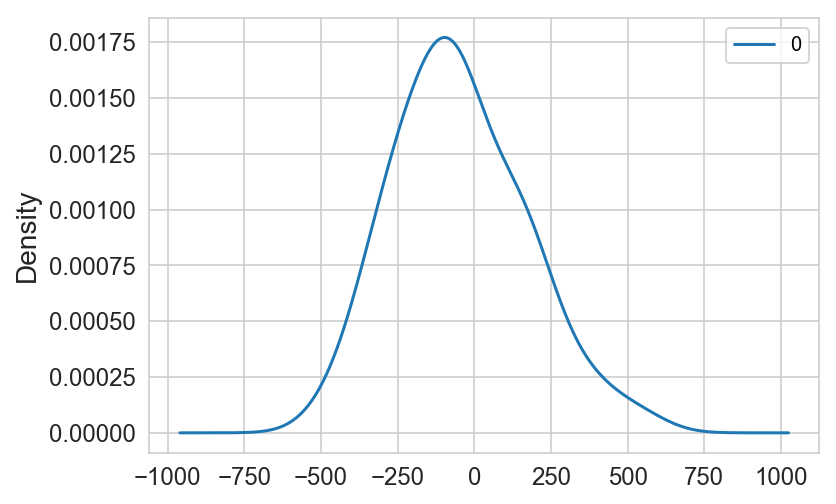

                0
count   48.000000
mean   -47.725345
std    212.738426
min   -463.905132
25%   -208.707455
50%    -61.605973
75%    122.283895
max    528.622076
0.49470936824469125


In [42]:
arima1 = ARIMA(y, order=(8,0,5)).fit()
print(arima1.summary())
print (r2_score(y, arima1.fittedvalues))

arima1.plot_predict(start=1, end=70)
plt.show()
# plot residual errors
residuals = DataFrame(arima1.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
print (r2_score(y, arima1.fittedvalues))

                            furniture
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


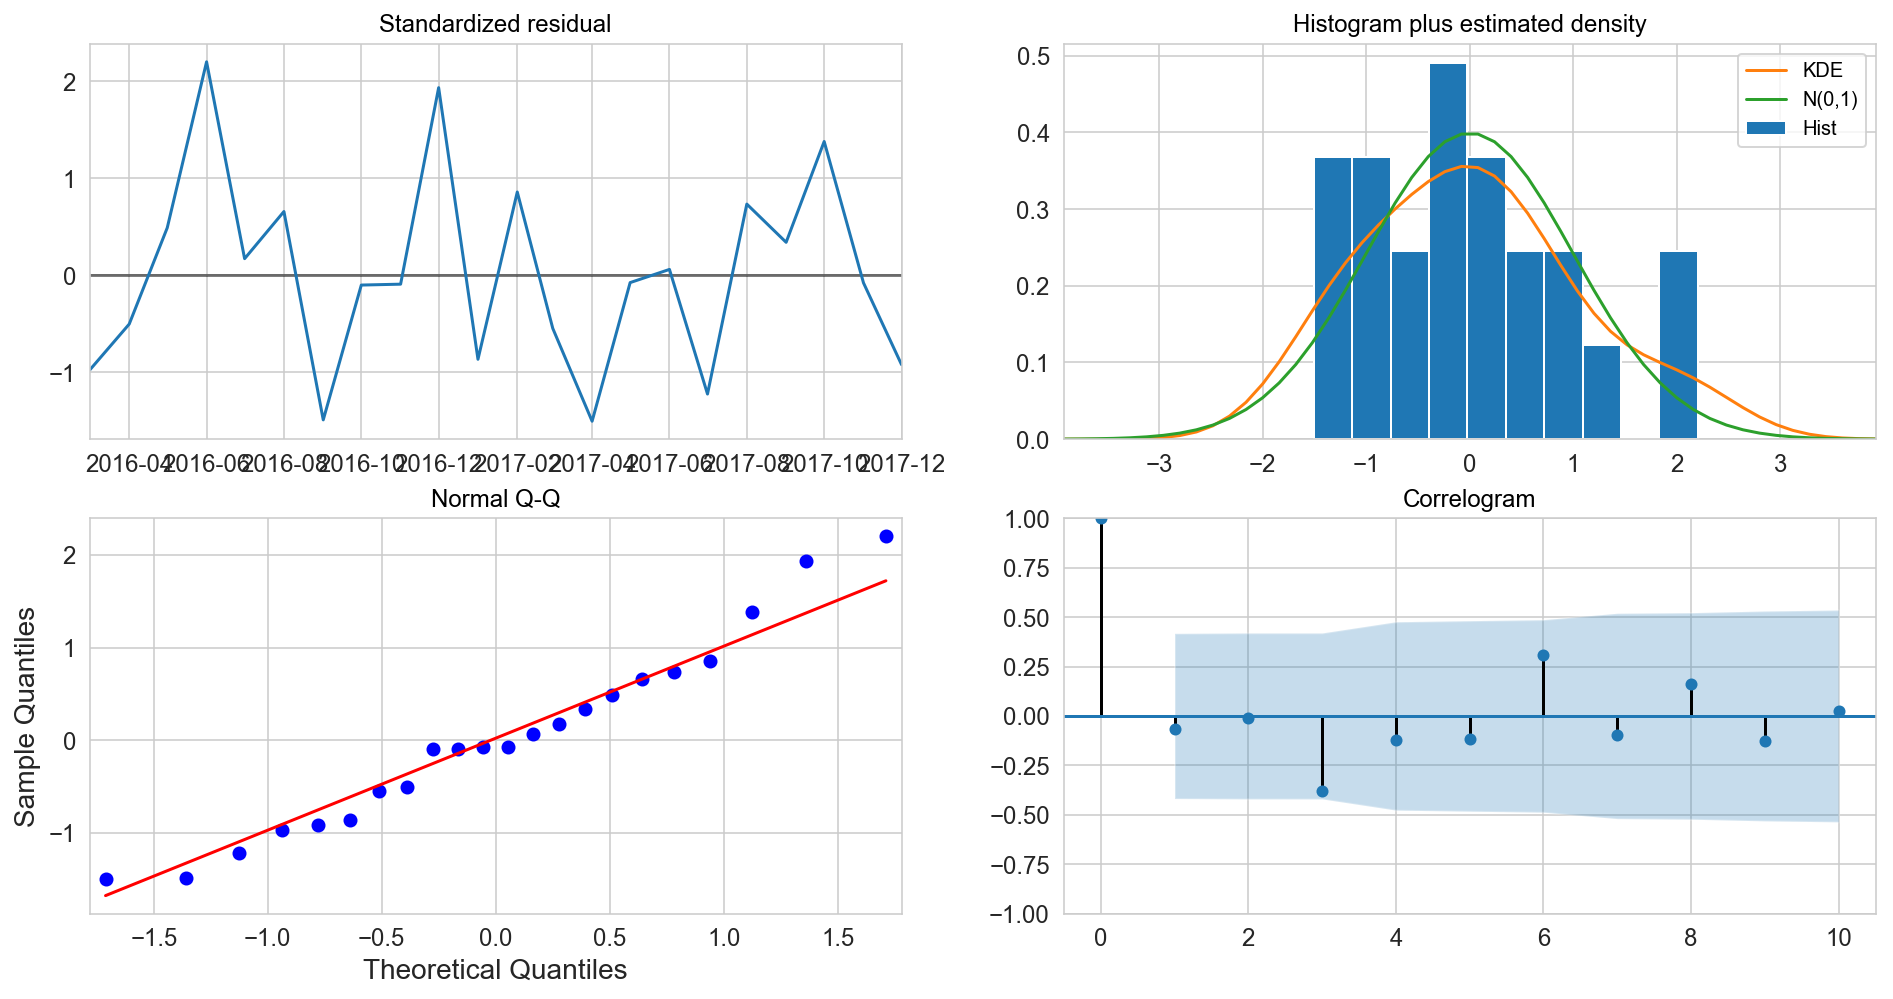

In [43]:
print ('                            furniture')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts
<a id="Validatingforecasts"></a>
compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

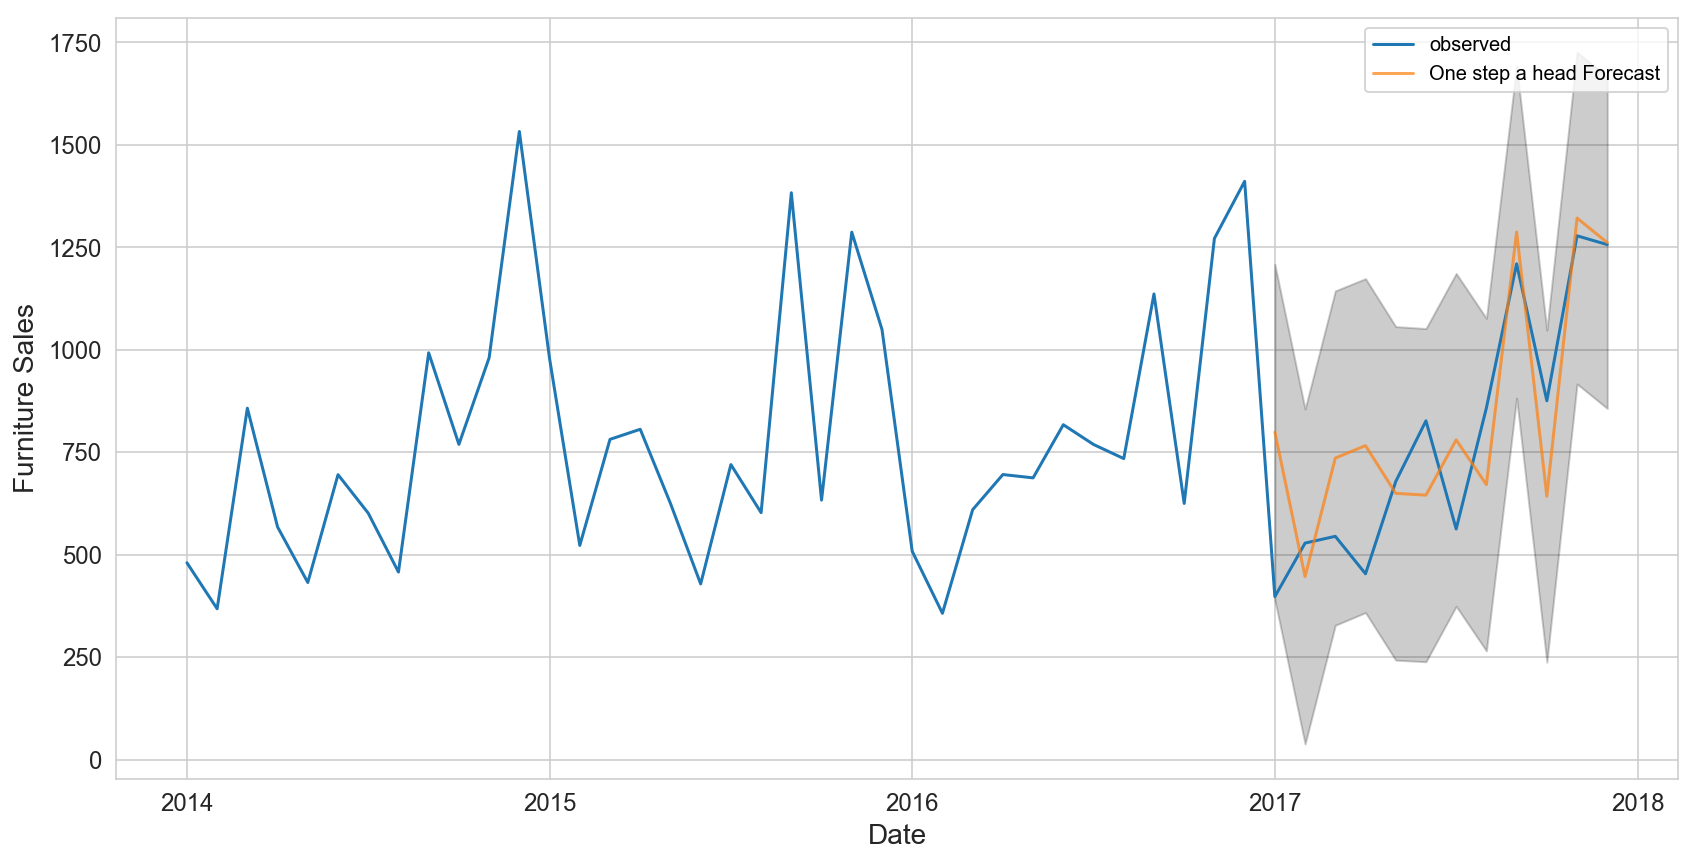

The Mean Squared Error of furniture forecasts is 39997.15
The Root Mean Squared Error of furniture forecasts is 199.99



In [91]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One step a head Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of furniture forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of furniture forecasts is {}\n'.format(round(np.sqrt(mse), 2)))

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [45]:
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of furniture forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of furniture forecasts is {}\n'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of furniture forecasts is 22993.57
The Root Mean Squared Error of furniture forecasts is 151.64



the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. 

The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64, 387.42 ,256.6 of the real sales. 

## Producing and visualizing forecasts
<a id="Producingandvisualizingforecasts"></a>

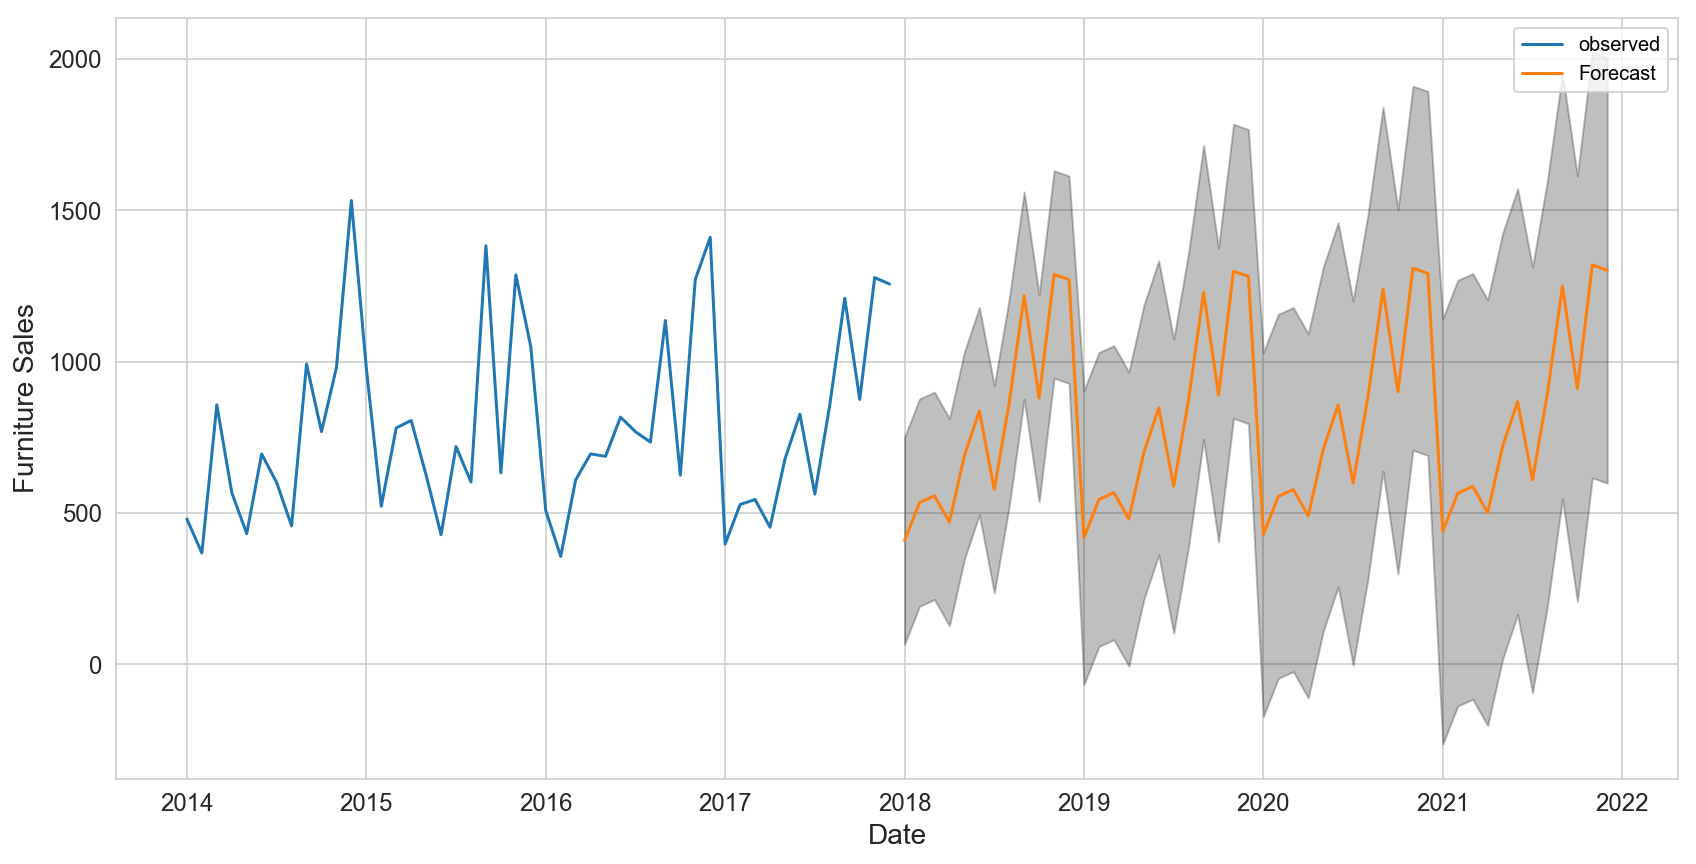

In [46]:
pred_uc = results.get_forecast(steps=48)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [47]:
f_pred =pred_uc.predicted_mean
f_pred_frame=f_pred.to_frame(name='furniture');
furniture_pred_frame= f_pred_frame.reset_index()

furniture_pred_frame.head(2)

index   furniture
0 2018-01-01  408.746684
1 2018-02-01  534.436086

## Summary Prediction
<a id="SummaryForecast"></a>

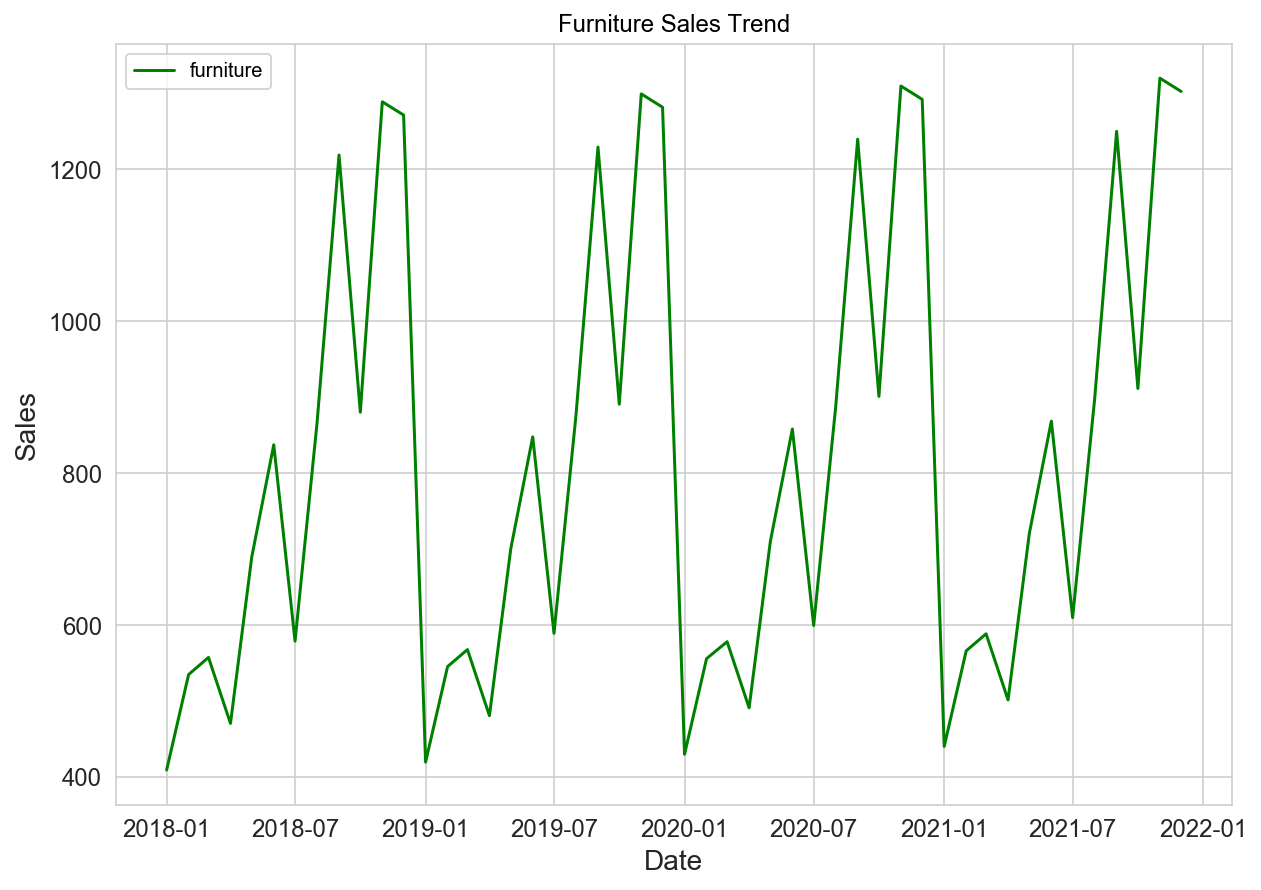

In [48]:
plt.figure(figsize=(10, 7))
#plt.plot(technology_pred_frame['index'], technology_pred_frame['technology'], 'b-')
plt.plot(furniture_pred_frame['index'], furniture_pred_frame['furniture'], 'g-')
#plt.plot(office_supplies_pred_frame['index'], office_supplies_pred_frame['officesupplies'], 'r-')

plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture Sales Trend');

                    #### train and test ####

In [47]:
dfy.head(2)
series = dfy.copy()
split_point = len(series) - 14
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 34, Validation 14


In [48]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [49]:
#baseline
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=1049.355, Expected=508
>Predicted=508.183, Expected=357
>Predicted=356.868, Expected=610
>Predicted=609.576, Expected=695
>Predicted=695.373, Expected=687
>Predicted=687.265, Expected=817
>Predicted=816.911, Expected=769
>Predicted=768.736, Expected=734
>Predicted=734.308, Expected=1136
>Predicted=1135.953, Expected=625
>Predicted=624.872, Expected=1271
>Predicted=1271.345, Expected=1411
>Predicted=1410.720, Expected=398
>Predicted=397.602, Expected=528
>Predicted=528.180, Expected=545
>Predicted=544.672, Expected=453
>Predicted=453.298, Expected=678
>Predicted=678.302, Expected=826
>Predicted=826.460, Expected=563
>Predicted=562.525, Expected=858
>Predicted=857.882, Expected=1210
>Predicted=1209.509, Expected=875
>Predicted=875.363, Expected=1278
>Predicted=1277.818, Expected=1256
RMSE: 350.388


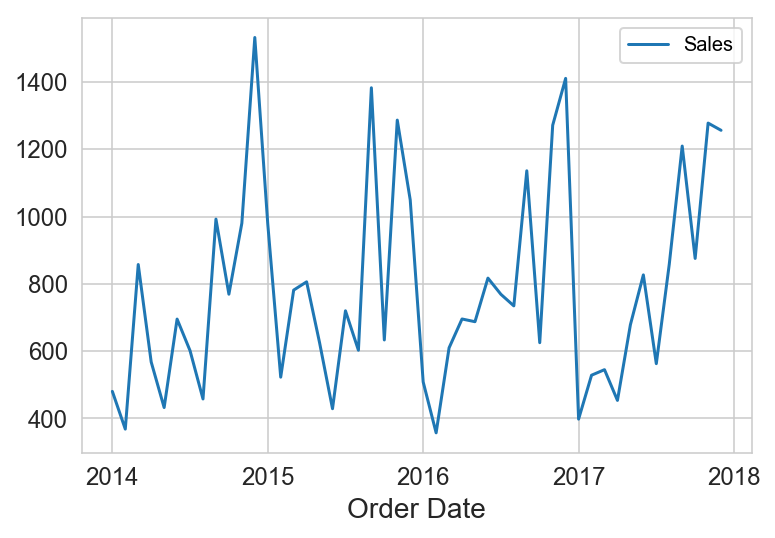

In [50]:
from pandas import Series
from matplotlib import pyplot
series.plot()
pyplot.show()

In [51]:
# check if stationary
from pandas import Series
from statsmodels.tsa.stattools import adfuller
X = y.copy()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
X.to_csv('stationary.csv')


ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


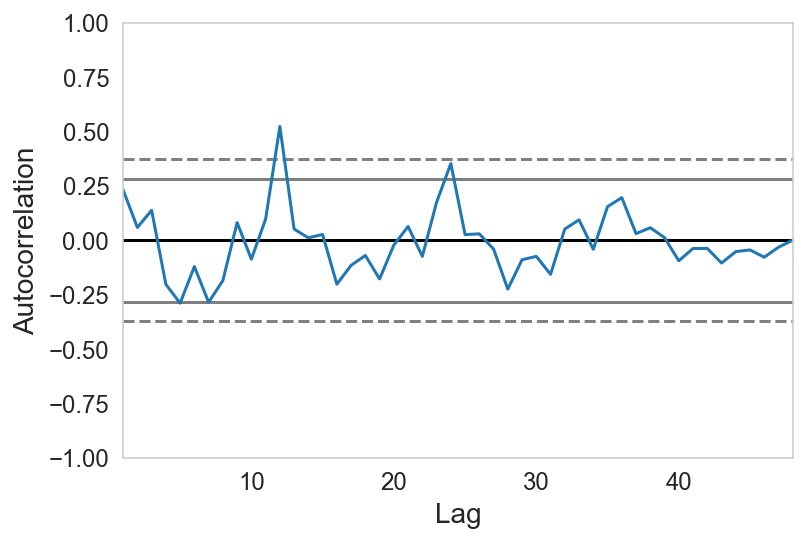

In [52]:
#lag
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = dfy.Sales.values
autocorrelation_plot(series)
pyplot.show()

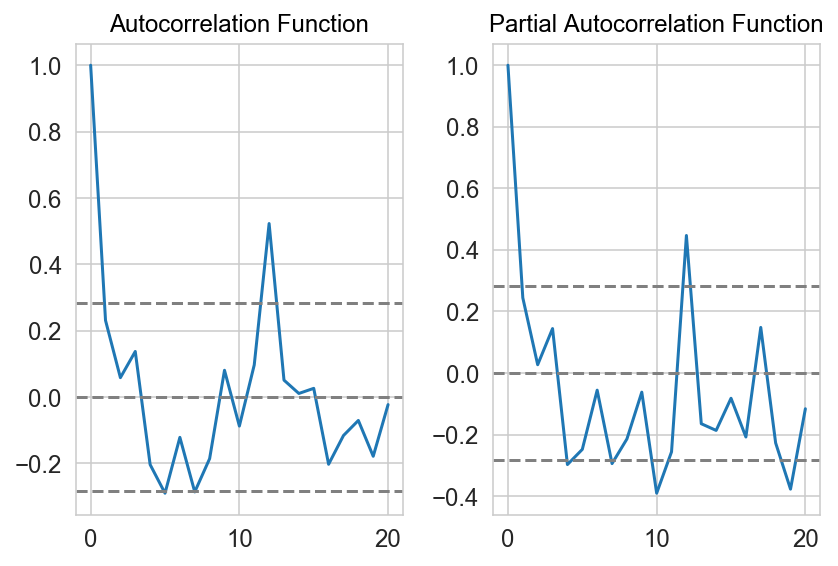

In [57]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dfy.Sales, nlags=20)
lag_pacf = pacf(dfy.Sales, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfy)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfy)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfy)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfy)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#Grid Search ARIMA Hyperparameters
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = dfy.copy()
# evaluate parameters
p_values = range(0,22)
d_values = range(0,1)
q_values = range(0,22)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=306.759
ARIMA(0, 0, 1) MSE=298.366
ARIMA(0, 0, 2) MSE=307.521
ARIMA(0, 0, 4) MSE=321.689
ARIMA(0, 0, 5) MSE=308.158
ARIMA(0, 1, 0) MSE=355.701
ARIMA(0, 1, 1) MSE=333.017
ARIMA(0, 2, 0) MSE=569.503
ARIMA(0, 2, 1) MSE=369.646
ARIMA(1, 0, 0) MSE=299.857
ARIMA(1, 1, 0) MSE=355.235
ARIMA(1, 1, 1) MSE=323.478
ARIMA(1, 1, 2) MSE=331.704
ARIMA(1, 2, 0) MSE=522.438
ARIMA(2, 0, 0) MSE=308.944
ARIMA(2, 1, 0) MSE=339.554
ARIMA(2, 1, 1) MSE=342.854
ARIMA(2, 2, 0) MSE=395.690
ARIMA(2, 2, 1) MSE=354.552
ARIMA(2, 2, 2) MSE=364.737


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   48
Model:                    ARMA(10, 0)   Log Likelihood                -330.541
Method:                       css-mle   S.D. of innovations            224.802
Date:                Thu, 22 Nov 2018   AIC                            685.082
Time:                        14:47:15   BIC                            707.536
Sample:                             0   HQIC                           693.568
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        785.2660      9.678     81.141      0.000     766.298     804.234
ar.L1.y       -0.0390      0.141     -0.277      0.784      -0.316       0.237
ar.L2.y       -0.3067      0.153     -2.010      0.0

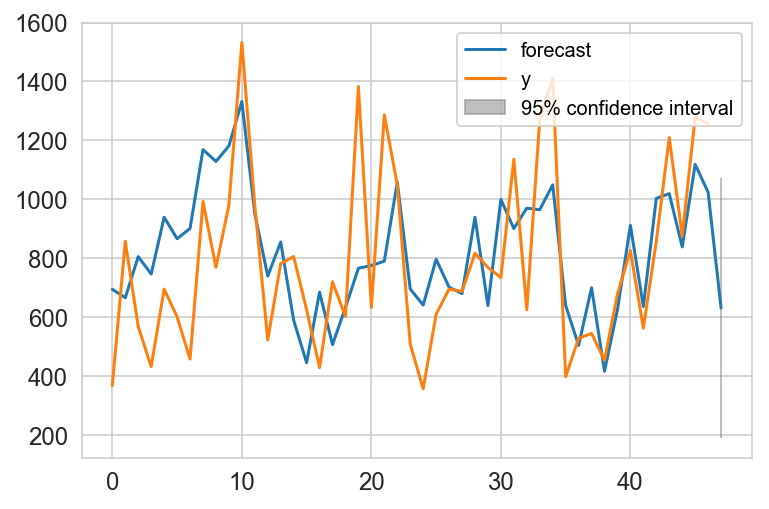

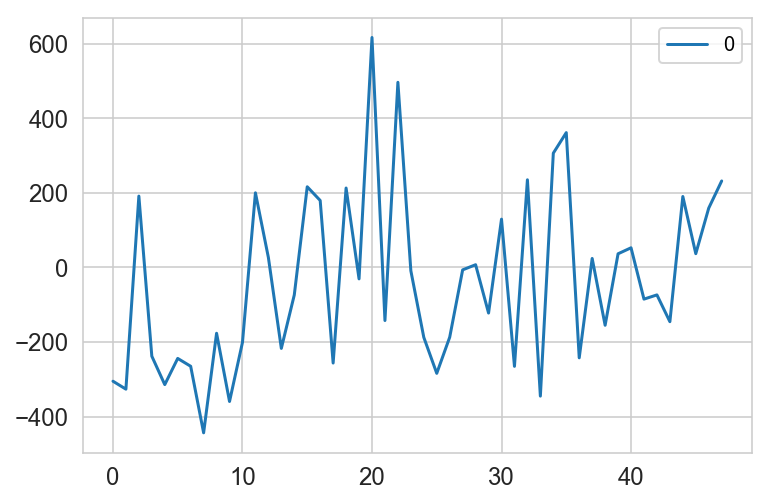

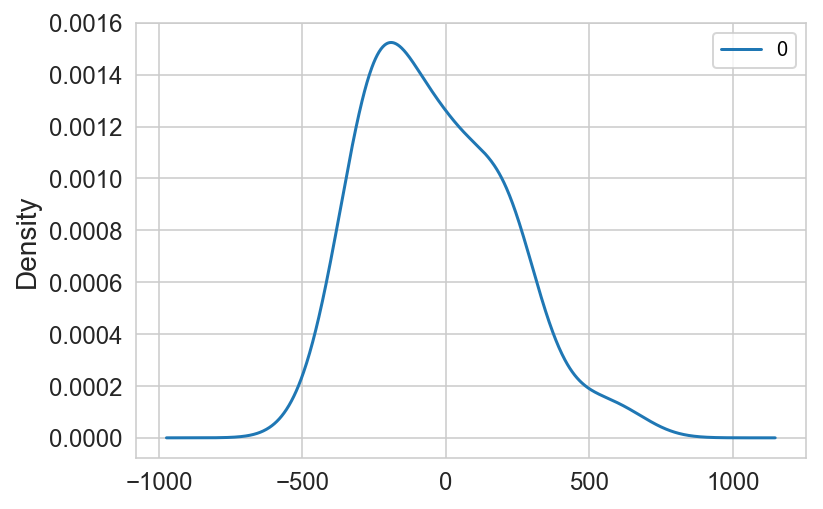

                0
count   48.000000
mean   -37.222092
std    238.561693
min   -443.556257
25%   -239.066932
50%    -73.648705
75%    164.393045
max    616.883172


In [83]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = dfy.Sales.values# fit model
model = ARIMA(series, order=(10,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
model_fit.plot_predict(start=1, end=48)
plt.show()
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=777.684528, expected=397.602133
predicted=549.687210, expected=528.179800
predicted=665.852469, expected=544.672240
predicted=386.825223, expected=453.297905
predicted=570.024229, expected=678.302328
predicted=857.905982, expected=826.460291
predicted=739.239515, expected=562.524857
predicted=1031.804728, expected=857.881889
predicted=1072.468983, expected=1209.508583
predicted=745.543030, expected=875.362728
predicted=995.609292, expected=1277.817759
predicted=1064.265329, expected=1256.298672
Test MSE: 32530.841


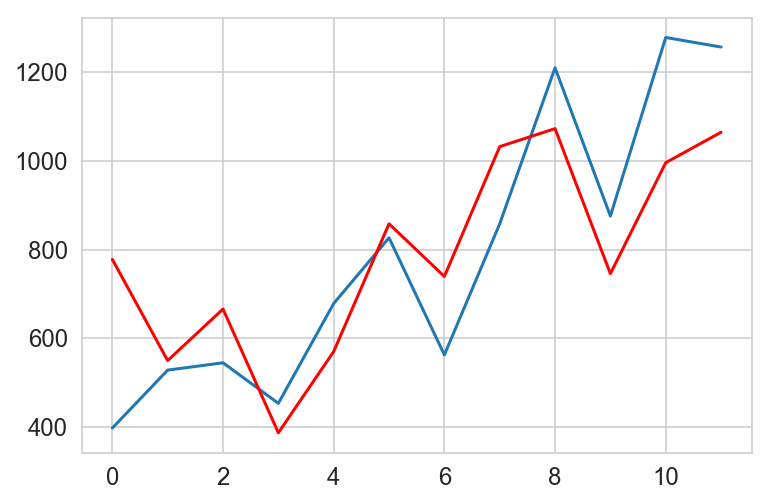

In [121]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
X = dfy.Sales.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(11,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

                    #### end here ####